# 1. Les packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib_inline 
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation
sns.set_style("whitegrid")

# Test
from scipy import stats
from scipy.stats import chi2_contingency, pearsonr, levene 
from statsmodels.tsa.seasonal import seasonal_decompose
#import statsmodels.api as sm

# Test de normalité
# pip install pingouin
import pingouin as pg

import warnings
warnings.filterwarnings('ignore')

# 2. Importation des données

In [2]:
# Importer les données
data_customers = pd.read_csv(r"C:\Users\diarr\Downloads\P6\customers.csv")
data_products = pd.read_csv(r"C:\Users\diarr\Downloads\P6\products.csv")
data_transactions = pd.read_csv(r"C:\Users\diarr\Downloads\P6\transactions.csv")

## 2.1. Analyse et exploration des données

* Dans cette étape nous allons explorer une par une toutes les DataFrames pour en extraire des informations , revoir la structure des données ainsi faire une courte analyse par la suite.

### 2.1.1. Dataframe "transactions"

In [3]:
# Observation des 5 premiers lignes de l'échantillon
data_transactions.head(5)

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [4]:
# Forme du jeu de donnés
data_transactions.shape

(679532, 4)

* Nous avions enregistré 679532 transactions c'est à dire chaque ligne représente une vente par produit et par client en 4 colonnes (caractéristiques).

In [5]:
# Vérifions
len(data_transactions["id_prod"]) == len(data_transactions)

True

In [6]:
# Vérifions
len(data_transactions["client_id"]) == len(data_transactions)

True

In [7]:
# Pourcentages des valeurs nulls
pourcentage_valeur_null = round((data_transactions.isnull().sum()/data_transactions.shape[0]*100),2).sort_values(ascending=False)
pourcentage_valeur_null

id_prod       0.0
date          0.0
session_id    0.0
client_id     0.0
dtype: float64

In [8]:
# Vérification des doublons
data_transactions[data_transactions.duplicated()].shape

(126, 4)

In [9]:
# Vérification des doublons
data_transactions[data_transactions.duplicated(["id_prod"])].shape

(676265, 4)

In [10]:
# Vérification des doublons
data_transactions[data_transactions.duplicated(["client_id"])].shape

(670930, 4)

In [11]:
# Vérification des doublons
data_transactions[data_transactions.duplicated(["session_id"])].shape

(337216, 4)

* Nous pouvons dire que les ventes ayant les mêmes identifiants ("session_id") viennent des commandes de clients qui ont acheté plusieurs produits en même temps dans le cadre de la même commande.
* Pour cela nous n'allons pas supprimer ces lignes.

In [12]:
# Garder les doublons
#data_transactions[data_transactions.duplicated(["session_id"], keep = False)].shape
data_duplicad = data_transactions[data_transactions["session_id"].duplicated(keep = False)].shape
data_duplicad

(516182, 4)

In [13]:
# Vérification des doublons
data_transactions[data_transactions.duplicated(["date"])]

,id_prod,date,session_id,client_id
23678,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_1
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
82253,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
92684,T_0,test_2021-03-01 02:30:02.237444,s_0,ct_1
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [14]:
# Typages de données
info = data_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [15]:
# Statistiques descriptives
statistique = data_transactions.describe(include = "all").T
statistique

,count,unique,top,freq
id_prod,679532,3267,1_369,2252
date,679532,679371,test_2021-03-01 02:30:02.237413,13
session_id,679532,342316,s_0,200
client_id,679532,8602,c_1609,25488


* Nous constatons après la statistique descriptive qu'il y'a erreurs sur certaines des dates, nous allons créer un mask pour en savoir plus sur ces dates

In [16]:
# Créer un mask pour afficher les transactions tests
data_transactions[data_transactions["date"] == "test_2021-03-01 02:30:02.237413"]

,id_prod,date,session_id,client_id
85486,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_1
103119,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
165314,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_1
213273,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
236225,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
255856,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_1
394969,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
412584,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
427604,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
440821,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0


In [17]:
# Créer un mask pour afficher les transactions tests
data_transactions[data_transactions["date"] == "test_2021-03-01 02:30:02.237420"]

,id_prod,date,session_id,client_id
92834,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_0
181233,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
285945,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_0
568854,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_0
648864,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1


* Nous constatons des transactions tests réalisées avec deux comptes clients "ct_1" et "ct_0" ( à voir sur la table client ) chaque "2021-03-01" sur le produit "T_0" , qui ont tous le même session "s_0" (200 lignes concernées).
* Ces tests sont des transactions fictives lors de lancement du site pour vérifier.
* Pour cela nous allons supprimer ces lignes avec des sessions identiques (200 lignes).
* Ensuite convertir la colonne "date" au bon format (date)
* Enfin utiliser la fonction "split" pour diviser une chaine en une liste en spécifiant le séparateur.

In [18]:
# Créer un mask
#data_transactions[data_transactions["id_prod"] == "T_0"].index
data_transactions[data_transactions["session_id"] == "s_0"].index

# suppression des lignes 
data_transactions = data_transactions.drop(data_transactions[data_transactions["session_id"] == "s_0"].index)

In [19]:
# Diviser la chaine
data_transactions["date"] = data_transactions["date"].str.split('_', n = 1, expand = True)[0]
data_transactions["date"] = data_transactions["date"].str.split('.', n = 1, expand = True)[0]

In [20]:
# Observation des 5 premiers lignes de l'échantillon
data_transactions.head(5)

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29,s_211425,c_103
1,1_251,2022-02-02 07:55:19,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33,s_225667,c_6714
3,2_209,2021-06-24 04:19:29,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08,s_325227,c_4232


In [21]:
# Convertir au format date
data_transactions["date"] = pd.to_datetime(data_transactions["date"], errors = 'coerce')

In [22]:
# Observation des 5 premiers lignes de l'échantillon
data_transactions.head(5)

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29,s_211425,c_103
1,1_251,2022-02-02 07:55:19,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33,s_225667,c_6714
3,2_209,2021-06-24 04:19:29,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08,s_325227,c_4232


In [23]:
# Forme du jeu de donnés
data_transactions.shape

(679332, 4)

In [24]:
# Typages de données
info = data_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


In [25]:
data_transactions.iloc[3019,1]

Timestamp('2023-02-01 18:14:25')

In [26]:
# Pourcentages des valeurs nulls
pourcentage_valeur_null = round((data_transactions.isnull().sum()/data_transactions.shape[0]*100),2).sort_values(ascending=False)
pourcentage_valeur_null

id_prod       0.0
date          0.0
session_id    0.0
client_id     0.0
dtype: float64

In [27]:
# afficher les cinq premières lignes
data_transactions.head(5)

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29,s_211425,c_103
1,1_251,2022-02-02 07:55:19,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33,s_225667,c_6714
3,2_209,2021-06-24 04:19:29,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08,s_325227,c_4232


In [28]:
# Forme du jeu de donnés
data_transactions.shape

(679332, 4)

In [29]:
# Typages de données
info = data_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


In [30]:
# faire une copie
data_transactions_copy = data_transactions.copy()

### 2.1.2. Dataframe "products"

In [31]:
# Observation des 5 premiers lignes de l'échantillon
data_products.head(5)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [32]:
# Forme du jeu de donnés
data_products.shape

(3287, 3)

* Nous avions 3287 produits c'est à dire chaque ligne représente un produit de la librairie avec 3 colonnes (caractéristiques).

In [33]:
# Vérifions
len(data_products["id_prod"]) == len(data_products)

True

In [34]:
# Pourcentages des valeurs nulls
pourcentage_valeur_null = round((data_products.isnull().sum()/data_products.shape[0]*100),2).sort_values(ascending=False)
pourcentage_valeur_null

id_prod    0.0
price      0.0
categ      0.0
dtype: float64

In [35]:
# Vérification des doublons
data_products[data_products.duplicated(["id_prod"])]

,id_prod,price,categ


In [36]:
# Typages de données
info = data_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [37]:
# Statistiques descriptives
statistique = data_products.describe(include = "all").T
statistique

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id_prod,3287,3287,0_1421,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,3287.0,NaN,NaN,NaN,21.856641,29.847908,-1.0,6.99,13.06,22.99,300.0
categ,3287.0,NaN,NaN,NaN,0.370246,0.615387,0.0,0.0,0.0,1.0,2.0


* Nous constatons d'après la statistique descriptive le prix d'un produit négatif et égale à "-1€" 
* Il s'agit du produit "T_0" qui sert de test du site en lignes.
* Nous allons supprimer ces lignes.

In [38]:
# Créer un mask pour afficher la ligne
data_products[data_products["price"] == -1.0]

,id_prod,price,categ
731,T_0,-1.0,0


In [39]:
# Créer un mask
data_products[data_products["id_prod"] == "T_0"].index

# suppression des lignes 
data_transactions = data_products.drop(data_products[data_products["id_prod"] == "T_0"].index)

In [40]:
# Afficher les différentes modalités (Trouver les éléments uniques de la colonnes)
data_products["categ"].unique()

array([0, 1, 2], dtype=int64)

* Après affichages des différentes modalités de catégories de poduits, nous obtenons qu'il y'a types de catégories de produits.

In [41]:
data_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [42]:
# faire une copie
data_products_copy = data_products.copy()

### 2.1.3 Dataframe "customers"

In [43]:
# Observation des 5 premiers lignes de l'échantillon
data_customers.head(5)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [44]:
# Forme du jeu de donnés
data_customers.shape

(8623, 3)

* On a 8623 lignes(client enregistrés) c'est à dire chaque ligne représente un unique client et 3 colonnes (caractéristiques).

In [45]:
# Vérifions
len(data_customers["client_id"]) == len(data_customers)

True

In [46]:
# Pourcentages des valeurs nulls
pourcentage_valeur_null = round((data_customers.isnull().sum()/data_customers.shape[0]*100),2).sort_values(ascending=False)
pourcentage_valeur_null

client_id    0.0
sex          0.0
birth        0.0
dtype: float64

* Pas de valeurs manquantes

In [47]:
# Vérification des doublons
data_customers[data_customers.duplicated()]

,client_id,sex,birth


In [48]:
# Vérification des doublons
data_customers[data_customers.duplicated(["client_id"])]

,client_id,sex,birth


* Nous constatons l'absence de doublons après vérification.

In [49]:
# Typages de données
info = data_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


* Les colonnes sont au bon format.

In [50]:
# Statistiques descriptives après convertion
statistique = data_customers.describe(include = "all").T
statistique

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
client_id,8623,8623,c_4410,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,8623,2,f,4491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
birth,8623.0,NaN,NaN,NaN,1978.280877,16.919535,1929.0,1966.0,1979.0,1992.0,2004.0


* Nous constatons qu'on a pas de valeurs aberrantes parceque l'années minimum de naissance est de 1929 ( 94ans ) et l'année maximum de naissance est de 2004 ( 19ans ).

In [51]:
# Afficher les différentes modalités
data_customers["client_id"].unique()

array(['c_4410', 'c_7839', 'c_1699', ..., 'c_5119', 'c_5643', 'c_84'],
      dtype=object)

* Nous avions constater dans la table "transactions", deux identifiants clients qui étaient utilisés lors de lancement du site.
* Nous allons vérifier  si ces identifiants clients sont aussi présents dans cette table.

In [52]:
# Créer un mask
data_customers[data_customers["client_id"] == "ct_1"]

,client_id,sex,birth
8494,ct_1,m,2001


In [53]:
# Créer un mask
data_customers[data_customers["client_id"] == "ct_0"]

,client_id,sex,birth
2735,ct_0,f,2001


* Nous constatons la présence de ces identifiants clients.
* Il s'agit des clients tests nés en 2001 avec comme identifiants : "ct_0" pour indiquer que c'est une fille et "ct_1" pour indiquer que c'est un garçon.
* Comme ils servent de test ces deux identifiants , dans ce cas nous allons les supprimer.

In [54]:
# Suppression de ces clients tests
data_customers = data_customers.drop(data_customers[data_customers["client_id"] == "ct_1"].index)
data_customers = data_customers.drop(data_customers[data_customers["client_id"] == "ct_0"].index)

* Nous allons créer une nouvelle colonne pour calculer l'âge actuelle de chacun des clients à partir de l'année en cours

In [55]:
# Création de nouvelles colonnes

# Age actuelle à partir de l'année en cours
from datetime import datetime

# Date et l'heure actuelle
now = datetime.now()

# Année actuelle
année_actuelle = now.strftime("%Y")

# Age actuelle
data_customers["age"] = int(année_actuelle) - data_customers["birth"]

In [56]:
# Statistiques descriptives après création de la colonne âge
statistique = data_customers.describe(include = "all").T
statistique

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
client_id,8621,8621,c_4410,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,8621,2,f,4490,NaN,NaN,NaN,NaN,NaN,NaN,NaN
birth,8621.0,NaN,NaN,NaN,1978.275606,16.917958,1929.0,1966.0,1979.0,1992.0,2004.0
age,8621.0,NaN,NaN,NaN,44.724394,16.917958,19.0,31.0,44.0,57.0,94.0


* La mesure statistique confirme l'hypothèse qu'on avait faite sur les clients que l'âge minimal est de 19ans et l'âge maximal est de 94ans.

In [57]:
# Typages de données
info = data_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8621 entries, 0 to 8622
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
 3   age        8621 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 336.8+ KB


In [58]:
# faire une copie
data_customers_copy = data_customers.copy()

## 2.2. Jointure des dataframes

* Dans cette parti nous allons faire deux jointure externes c'est à dire garder toutes les observations des deux dataframes avec leurs identifiants clés pour chaque dataframe qui permettent la jointure;
* La première jointure sera avec les dataframes transactions customers.
* Ensuite la deuxième jointure sera le résultat obtenu lors de la première jointure avec à nouveau le dataframe products pour obtenu un dataframe final.

In [59]:
# Les 3 dataframes
print(data_transactions_copy.shape), print(data_transactions_copy.columns)
print("---------------------------------------------------------")
print(data_products_copy.shape), print(data_products_copy.columns)
print("---------------------------------------------------------")
print(data_customers_copy.shape), print(data_customers_copy.columns)

(679332, 4)
Index(['id_prod', 'date', 'session_id', 'client_id'], dtype='object')
---------------------------------------------------------
(3287, 3)
Index(['id_prod', 'price', 'categ'], dtype='object')
---------------------------------------------------------
(8621, 4)
Index(['client_id', 'sex', 'birth', 'age'], dtype='object')


(None, None)

### 2.2.1. Première jointure

* Nous allons faire la jointure des deux tables "df_transactions" qui est la table des transactions et "data-customers" qui est la table customers

In [60]:
# verifier le nombre de colonne et ligne avant jointure
print(data_transactions_copy.shape)
print(data_customers_copy.shape)
print(data_products_copy.shape)

(679332, 4)
(8621, 4)
(3287, 3)


In [61]:
# jointure des deux dataframes
df_transa_custo = pd.merge(data_transactions_copy, data_customers_copy, on = "client_id", how = "outer", indicator = True)
print(df_transa_custo.shape)
df_transa_custo.head(3)                         

(679353, 8)


,id_prod,date,session_id,client_id,sex,birth,age,_merge
0,0_1518,2022-05-20 13:21:29,s_211425,c_103,f,1986,37,both
1,0_1627,2022-06-18 05:55:31,s_225494,c_103,f,1986,37,both
2,0_1104,2023-02-08 17:31:06,s_338755,c_103,f,1986,37,both


In [62]:
# verifier le nombre de colonne et ligne après jointure
print(df_transa_custo.shape)

(679353, 8)


In [63]:
# vérifier les valeurs manquantes après jointure
pourcentage_valeur_null = round(df_transa_custo.isnull().sum()/df_transa_custo.shape[0]*100,2).sort_values(ascending = False)
pourcentage_valeur_null

id_prod       0.0
date          0.0
session_id    0.0
client_id     0.0
sex           0.0
birth         0.0
age           0.0
_merge        0.0
dtype: float64

In [64]:
# On regarde si la colonne _merge contient autre chose que des 'both'
df_test_join1 = df_transa_custo[df_transa_custo['_merge']!='both']

# On observe
print(df_test_join1.shape)
df_test_join1.head()

(21, 8)


,id_prod,date,session_id,client_id,sex,birth,age,_merge
679332,NaN,NaT,NaN,c_8253,f,2001,22,right_only
679333,NaN,NaT,NaN,c_3789,f,1997,26,right_only
679334,NaN,NaT,NaN,c_4406,f,1998,25,right_only
679335,NaN,NaT,NaN,c_2706,f,1967,56,right_only
679336,NaN,NaT,NaN,c_3443,m,1959,64,right_only


In [65]:
# suppression de la colonne  '_merge'
df_transa_custo = df_transa_custo.drop(columns = ['_merge'])

### 2.2.2. Deuxième jointure

In [66]:
# jointure des deux dataframes
df_final = pd.merge(df_transa_custo, data_products_copy, on = "id_prod", how = "outer", indicator = True)
print(df_final.shape)
df_final.head(3)   

(679375, 10)


,id_prod,date,session_id,client_id,sex,birth,age,price,categ,_merge
0,0_1518,2022-05-20 13:21:29,s_211425,c_103,f,1986.0,37.0,4.18,0.0,both
1,0_1518,2021-07-20 13:21:29,s_64849,c_103,f,1986.0,37.0,4.18,0.0,both
2,0_1518,2022-08-20 13:21:29,s_255965,c_103,f,1986.0,37.0,4.18,0.0,both


In [67]:
# verifier le nombre de colonne et ligne après jointure
print(df_final.shape)

(679375, 10)


In [68]:
# vérifier les valeurs manquantes après jointure
pourcentage_valeur_null = round(df_final.isnull().sum()/df_final.shape[0]*100,2).sort_values(ascending = False)
pourcentage_valeur_null

price         0.04
categ         0.04
date          0.01
session_id    0.01
id_prod       0.00
client_id     0.00
sex           0.00
birth         0.00
age           0.00
_merge        0.00
dtype: float64

In [69]:
# On regarde si la colonne _merge contient autre chose que des 'both'
df_test_join2 = df_final[df_final['_merge']!='both']

# On observe
print(df_test_join2.shape)
df_test_join2.head()

(264, 10)


,id_prod,date,session_id,client_id,sex,birth,age,price,categ,_merge
311747,0_2245,2021-04-22 04:57:20,s_23987,c_6714,f,1968.0,55.0,NaN,NaN,left_only
311748,0_2245,2021-06-05 17:04:43,s_44481,c_6714,f,1968.0,55.0,NaN,NaN,left_only
311749,0_2245,2022-04-05 17:04:43,s_189669,c_6714,f,1968.0,55.0,NaN,NaN,left_only
311750,0_2245,2022-05-05 17:04:43,s_204093,c_6714,f,1968.0,55.0,NaN,NaN,left_only
311751,0_2245,2022-12-05 17:04:43,s_307520,c_6714,f,1968.0,55.0,NaN,NaN,left_only


In [70]:
# suppression de la colonne  '_merge'
df_final = df_final.drop(columns = ['_merge'])

In [71]:
# valeurs manquantes par colonnes
df_final.isnull().sum()

id_prod        21
date           43
session_id     43
client_id      22
sex            22
birth          22
age            22
price         242
categ         242
dtype: int64

* Après la vérification des valeurs manquantes, nous allons afficher ces différentes colonnes au format dataframe pour en savoir plus la raison de ces valeurs manquantes.

In [72]:
# afficher la colonne price
df_final[df_final["price"].isnull()]

,id_prod,date,session_id,client_id,sex,birth,age,price,categ
311747,0_2245,2021-04-22 04:57:20,s_23987,c_6714,f,1968.0,55.0,NaN,NaN
311748,0_2245,2021-06-05 17:04:43,s_44481,c_6714,f,1968.0,55.0,NaN,NaN
311749,0_2245,2022-04-05 17:04:43,s_189669,c_6714,f,1968.0,55.0,NaN,NaN
311750,0_2245,2022-05-05 17:04:43,s_204093,c_6714,f,1968.0,55.0,NaN,NaN
311751,0_2245,2022-12-05 17:04:43,s_307520,c_6714,f,1968.0,55.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
679348,NaN,NaT,NaN,c_862,f,1956.0,67.0,NaN,NaN
679349,NaN,NaT,NaN,c_7584,f,1960.0,63.0,NaN,NaN
679350,NaN,NaT,NaN,c_90,m,2001.0,22.0,NaN,NaN
679351,NaN,NaT,NaN,c_587,m,1993.0,30.0,NaN,NaN


In [73]:
# Créer un mask
df_mask = df_final[(df_final["id_prod"] == "0_2245") & (df_final["categ"] != 0) ]
df_mask

,id_prod,date,session_id,client_id,sex,birth,age,price,categ
311747,0_2245,2021-04-22 04:57:20,s_23987,c_6714,f,1968.0,55.0,NaN,NaN
311748,0_2245,2021-06-05 17:04:43,s_44481,c_6714,f,1968.0,55.0,NaN,NaN
311749,0_2245,2022-04-05 17:04:43,s_189669,c_6714,f,1968.0,55.0,NaN,NaN
311750,0_2245,2022-05-05 17:04:43,s_204093,c_6714,f,1968.0,55.0,NaN,NaN
311751,0_2245,2022-12-05 17:04:43,s_307520,c_6714,f,1968.0,55.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
311963,0_2245,2021-10-19 09:32:03,s_107022,c_6128,m,1986.0,37.0,NaN,NaN
311964,0_2245,2021-11-12 09:25:22,s_118458,c_7416,m,1933.0,90.0,NaN,NaN
311965,0_2245,2021-08-22 08:51:27,s_79102,c_6752,m,1987.0,36.0,NaN,NaN
311966,0_2245,2022-04-22 08:51:27,s_197669,c_6752,m,1987.0,36.0,NaN,NaN


In [74]:
# afficher la colonne id_prod
df_final[df_final["id_prod"].isnull()]

,id_prod,date,session_id,client_id,sex,birth,age,price,categ
679332,NaN,NaT,NaN,c_8253,f,2001.0,22.0,NaN,NaN
679333,NaN,NaT,NaN,c_3789,f,1997.0,26.0,NaN,NaN
679334,NaN,NaT,NaN,c_4406,f,1998.0,25.0,NaN,NaN
679335,NaN,NaT,NaN,c_2706,f,1967.0,56.0,NaN,NaN
679336,NaN,NaT,NaN,c_3443,m,1959.0,64.0,NaN,NaN
679337,NaN,NaT,NaN,c_4447,m,1956.0,67.0,NaN,NaN
679338,NaN,NaT,NaN,c_3017,f,1992.0,31.0,NaN,NaN
679339,NaN,NaT,NaN,c_4086,f,1992.0,31.0,NaN,NaN
679340,NaN,NaT,NaN,c_6930,m,2004.0,19.0,NaN,NaN
679341,NaN,NaT,NaN,c_4358,m,1999.0,24.0,NaN,NaN


* Nous constatons que le produit avec l'identifiant "0_2245" a été vendu 242 fois de même que ces catégories de produits (242 fois) en différentes session et par différents clients
* Pour cela on pourra remplacer les catégories de produits par 0 (car la statue étant donnant par l'identifiant du produit 0_225") et remplacer les produits qui n'ont pas de prix par la mediane (moins sensible aux valeurs aberrantes) des prix de la catégorie 0.
* Ensuite on retrouve 22 clients qui ont un compte sur le site mais n'ont jamais fait d'achat (session_id = NaN), dans ce cas nous allons les ignorer.
* De même on retrouve 21 produits sur le site qui n'ont jamais été vendu, nous allons les ignorer. 

In [75]:
# Remplacer les catégories de produit manquants
df_final["categ"] = np.where(df_final["id_prod"] == "0_2245", 0, df_final["categ"])

# Remplacer les prix manquants par la mediane
df_final["price"] = np.where(df_final["id_prod"] == "0_2245", 
                                           df_final.loc[(df_final["categ"]==0),"price"].median(),
                                           df_final["price"])

In [76]:
# faire une copie
dff = df_final.copy()
# renommer les valeurs de la colonne
df_final.loc[(df_final["categ"] == 0, "categ")] = "categ_0"
df_final.loc[(df_final["categ"] == 1, "categ")] = "categ_1"
df_final.loc[(df_final["categ"] == 2, "categ")] = "categ_2"

In [77]:
df_final.nunique()

id_prod         3288
date          675678
session_id    342315
client_id       8621
sex                2
birth             76
age               76
price           1455
categ              3
dtype: int64

In [78]:
# afficher à nouveau les valeurs manquantes par colonnes
df_final.isnull().sum()

id_prod       21
date          43
session_id    43
client_id     22
sex           22
birth         22
age           22
price         21
categ         21
dtype: int64

* Nous obtenons toujours des valeurs manquantes dans les colonnes mais de très faible quantité, pour cela nous allons les supprimer pour la suite de l'analyse.

In [79]:
# Suppression des valeurs manquantes
df_final = df_final.dropna()

# la dimension
print(df_final.shape)

data_final = df_final.copy()

(679332, 9)


In [80]:
# afficher à nouveau les valeurs manquantes par colonnes
data_final.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
sex           0
birth         0
age           0
price         0
categ         0
dtype: int64

In [81]:
# Convertir au bon format
data_final["categ"] = data_final["categ"].astype(object)

In [82]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   sex         679332 non-null  object        
 5   birth       679332 non-null  float64       
 6   age         679332 non-null  float64       
 7   price       679332 non-null  float64       
 8   categ       679332 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 51.8+ MB


* Nous obtenons un dataframe final prêt à l'emploi pour répondre aux différentes demandes.

In [83]:
# afficher le dataframe final
data_final.head(3)

,id_prod,date,session_id,client_id,sex,birth,age,price,categ
0,0_1518,2022-05-20 13:21:29,s_211425,c_103,f,1986.0,37.0,4.18,categ_0
1,0_1518,2021-07-20 13:21:29,s_64849,c_103,f,1986.0,37.0,4.18,categ_0
2,0_1518,2022-08-20 13:21:29,s_255965,c_103,f,1986.0,37.0,4.18,categ_0


In [84]:
# vérification des valeurs manquantes
data_final[data_final["client_id"] == "NaN"]

,id_prod,date,session_id,client_id,sex,birth,age,price,categ


In [85]:
# vérification des valeurs existantes
data_final[data_final["client_id"] != "NaN"].shape

(679332, 9)

* Nous allons créer de nouvelles colonne à partir de la colonne "date" pour faciliter la manipulation des dates

In [86]:
# Création de nouvelles colonnes
# Année
#data_transactions["année"] = data_transactions["date"].dt.year
data_final["année"] = data_final.date.dt.year

# Mois
data_final["mois"] = data_final.date.dt.month

# Jour (jour du mois)
data_final["jour_du_mois"] = data_final.date.dt.day

In [87]:
# Convertir au bon format
data_final["age"] = data_final["age"].astype(int)
data_final["birth"] = data_final["birth"].astype(int)

In [88]:
data_final.shape

(679332, 12)

# 3. Analyse des différents indicateurs de vente

## 3.1 Demandes de Antoine

### 3.1.a) Le chiffre d'affaires et total des ventes en ligne

In [89]:
# Total chiffre d'affaires
Total_CA = round(data_final["price"].sum(), 2)

# Le nombre de ventes correspond à la session_id
Nombre_de_ventes = data_final["session_id"].count()

# Afficher les résultats
print(f" Le total du chiffre d'affaires réalisé des ventes en lignes est : {Total_CA}euros")
print(f" Le nombre total de ventes réalisés en lignes est : {Nombre_de_ventes} ventes")

 Le total du chiffre d'affaires réalisé des ventes en lignes est : 11855936.47euros
 Le nombre total de ventes réalisés en lignes est : 679332 ventes


### 3.1.b) Chiffre d'affaires par année (annuelles) et total des ventes

In [90]:
# Calcul du chiffre d'affaires annuel
CA_annuel = data_final.groupby(["année"])["price"].sum().sort_values(ascending=False).reset_index()
CA_annuel

,année,price
0,2022,6109880.61
1,2021,4771695.69
2,2023,974360.17


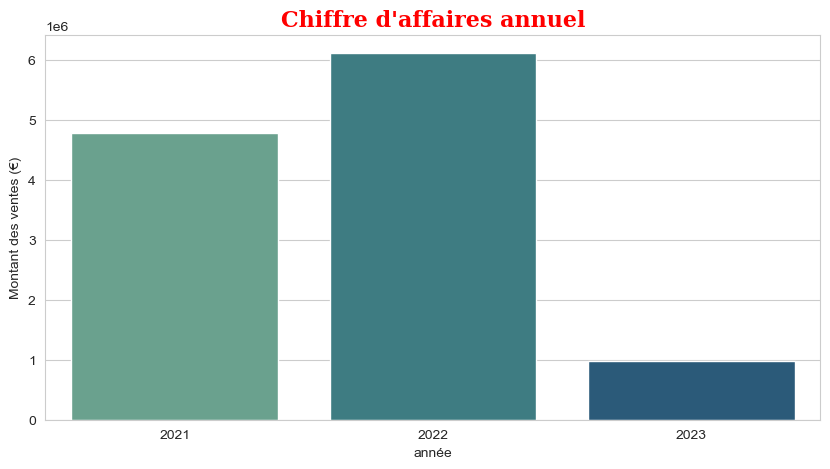

In [91]:
# Visualisation
font_title = {"family": "serif",
              "color":  "red",
              "weight": "bold",
              "size": 16}
plt.figure(figsize=(10, 5))
sns.barplot(x = CA_annuel["année"], y = CA_annuel["price"], data = CA_annuel, palette = "crest")
plt.title("Chiffre d'affaires annuel", fontdict=font_title)
plt.ylabel("Montant des ventes (€)")
plt.xlabel("année")
plt.show()

In [92]:
# Total des ventes annuel
TV_annuel = data_final.groupby(["année"])["session_id"].count().sort_values(ascending=False).reset_index()
TV_annuel

,année,session_id
0,2022,346500
1,2021,278335
2,2023,54497


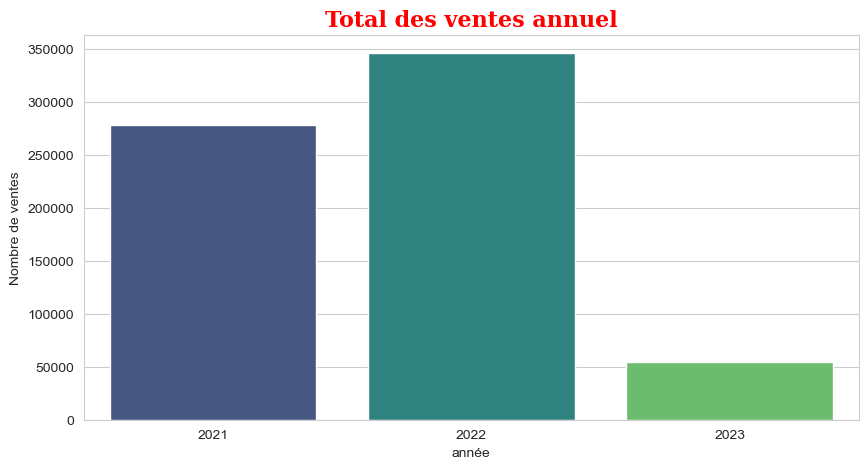

In [93]:
# Visualisation
plt.figure(figsize=(10, 5))
sns.barplot(x = TV_annuel["année"], y = TV_annuel["session_id"], data = TV_annuel, palette = "viridis")
plt.title("Total des ventes annuel", fontdict=font_title)
plt.ylabel("Nombre de ventes")
plt.xlabel("année")
plt.show()

* Nous obtenons 2022 comme étant la meilleure année avec un total de chiffre d'affaires égale à 6109880,61 euros avec un total des ventes de 346500 livres.
* Par contre l'année 2023 n'est pas encore complete puisqu'on est au mois d'Avril et qu'il nous reste 8 autres mois pour les comparer réellement aux années précédentes;
* Pour cela nous allons calculer le chiffre d'affaires mensuelles afin de voir son évolution.

In [94]:
# calculer le chiffre d'affaires année mois
CA_mensuel = data_final.groupby(["année","mois"])["price"].sum().sort_values(ascending = False).reset_index()
CA_mensuel.head(10)

,année,mois,price
0,2022,2,535681.39
1,2021,12,525987.21
2,2022,1,525388.94
3,2023,1,517610.48
4,2022,5,517292.44
5,2021,11,516267.63
6,2022,3,515566.42
7,2022,7,510903.00
8,2022,12,510279.44
9,2022,10,508017.67


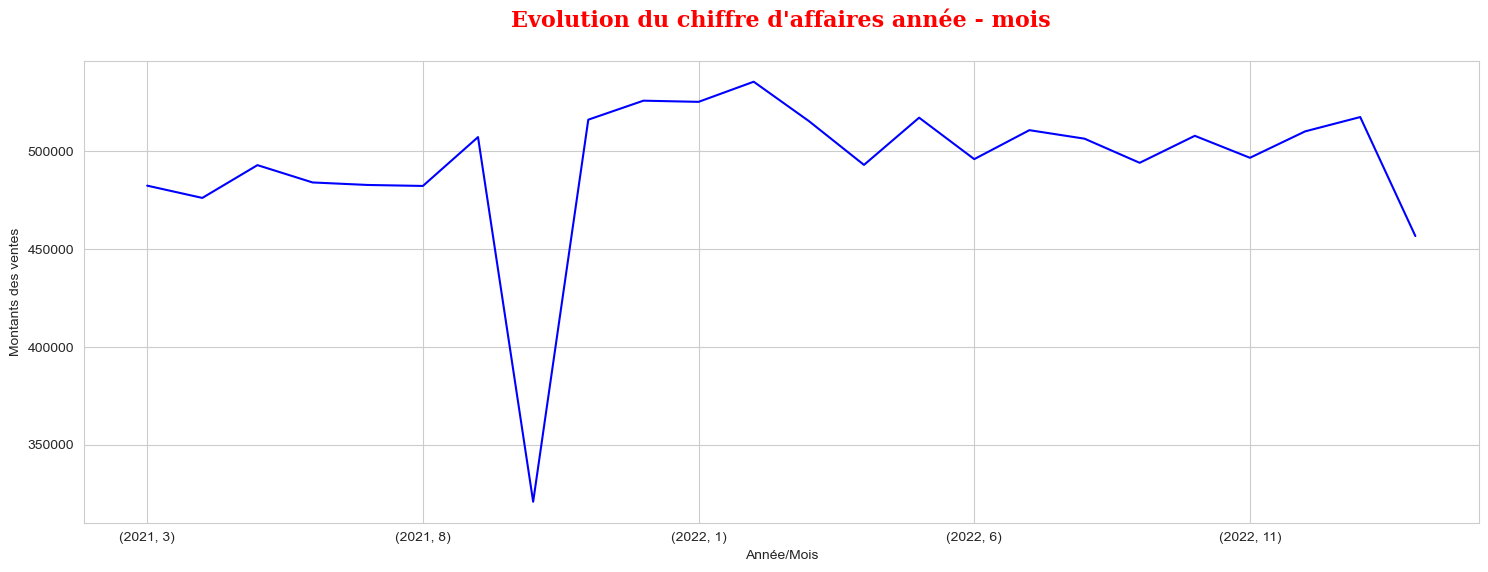

In [95]:
# Visualisation
CA_mensuel = data_final.groupby(["année","mois"])["price"].sum()
fig = plt.figure(figsize=(18, 6))
CA_mensuel.plot(color="blue")
plt.xlabel("Année/Mois")
plt.ylabel("Montants des ventes")
plt.title(f"Evolution du chiffre d'affaires année - mois\n",
         fontdict = font_title)
plt.show()

* Nous constatons qu'on a une baisse (chute) du chiffre d'affaires au mois d'octobre ( mais nous allons le conserver).
* Ce chute peut être du à l'insdiponibilité de plusieurs produits (livres) que les clients ne retrouvent pas sur le site, ça pourrait être aussi une des catégories de livres qui n'était pas vendu à cette période ou liée à une maintenance (problème technique) du site pendant le mois d'octobre. Dans ce cas il y'aura pas de ventes
* Cela peut entrainer la chute du chiffre d'affaire du mois d'octobre.

In [96]:
# calculer le total des ventes année mois
TA_mensuel = data_final.groupby(["année","mois"])["session_id"].count().sort_values(ascending = False).reset_index()
TA_mensuel.head(10)

,année,mois,session_id
0,2021,9,33326
1,2021,12,32464
2,2022,5,29991
3,2022,3,29707
4,2022,2,29605
5,2022,1,29348
6,2022,10,28974
7,2023,1,28945
8,2022,7,28682
9,2022,12,28625


In [97]:
# la dernière session
print(data_final["date"].nlargest(1))

356690   2023-02-28 23:58:30
Name: date, dtype: datetime64[ns]


### 3.1.c) Chiffre d'affaires mensuel et total des ventes

* Nous allons essayer d'obtenir le mois où on a fait le plus de ventes et de chiffre d'affaires.
* L'idée est d'extraire les mois à partir de nos , ainsi générer le chiffre d'affaire.

In [98]:
# Calcul du chiffre d'affaires mensuel
#CA_mensuel = data_final.groupby(data_final["date"].dt.month)["price"].sum().sort_values(ascending=False).reset_index()
CA_mensuel = data_final.groupby(data_final["mois"])["price"].sum().sort_values(ascending=False).reset_index()
CA_mensuel

,mois,price
0,1,1042999.42
1,12,1036266.65
2,11,1013042.46
3,5,1010315.83
4,9,1001565.00
5,3,998096.94
6,7,993778.36
7,2,992431.08
8,8,988921.89
9,6,980244.54


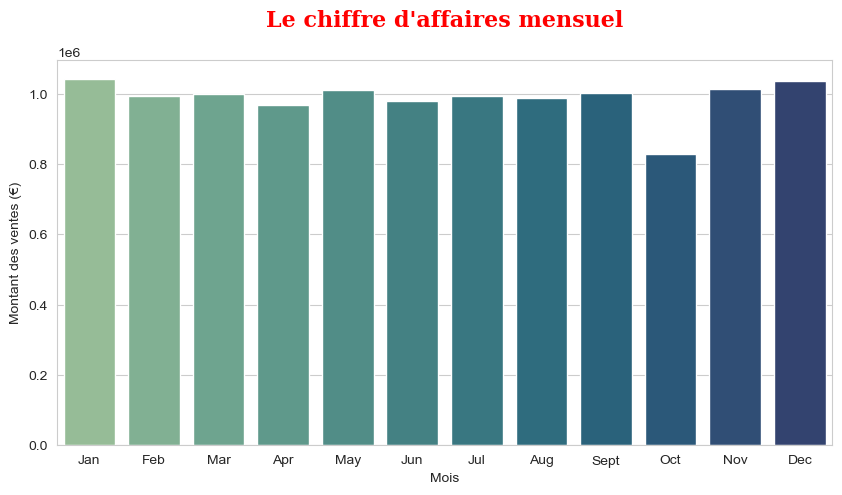

In [99]:
# Visualisation
plt.figure(figsize=(10, 5))
sns.barplot(x = CA_mensuel["mois"], y = CA_mensuel["price"], data = CA_mensuel, palette="crest")
plt.title("Le chiffre d'affaires mensuel\n", fontdict=font_title)
plt.ylabel("Montant des ventes (€)")
plt.xlabel("Mois")
plt.xticks(np.arange(0,12), ['Jan','Feb','Mar','Apr','May','Jun',
                             'Jul','Aug','Sept','Oct','Nov','Dec'], 
           rotation='horizontal')
plt.show()

In [100]:
# Total des ventes mensuel
TV_mensuel = data_final.groupby(data_final["mois"])["session_id"].count().sort_values(ascending=False).reset_index()
TV_mensuel

,mois,session_id
0,9,61641
1,12,61089
2,3,58317
3,1,58293
4,5,58284
5,11,56895
6,4,56073
7,6,55368
8,2,55157
9,8,54211


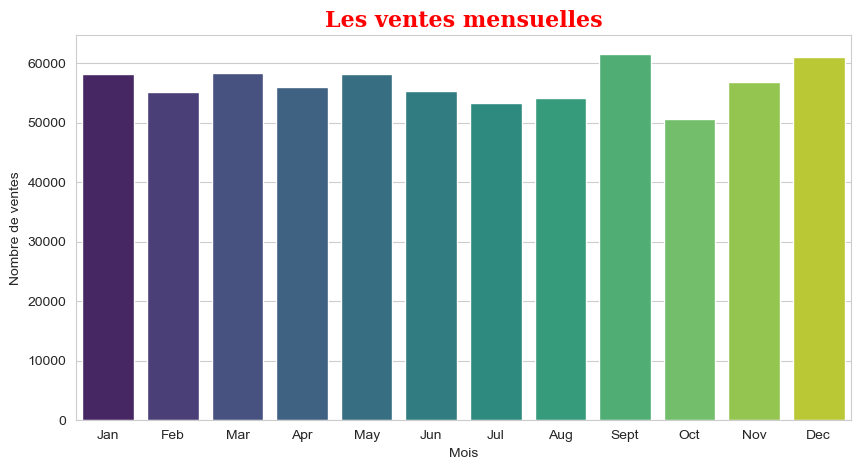

In [101]:
# Visualisation
plt.figure(figsize=(10, 5))
sns.barplot(x = TV_mensuel["mois"], y = TV_mensuel["session_id"], data = TV_mensuel, palette="viridis")
plt.title("Les ventes mensuelles", fontdict=font_title)
plt.ylabel("Nombre de ventes")
plt.xlabel("Mois")
plt.xticks(np.arange(0,12), ['Jan','Feb','Mar','Apr','May','Jun',
                             'Jul','Aug','Sept','Oct','Nov','Dec'], 
           rotation='horizontal')
plt.show()

* Nous obtenons le mois de janvier comme étant le mois où nous avions fait le plus de chiffre d'affaires avec un montant de 1042999,24 euros pour un total des ventes de 58293 livres.
* Le mois de septembre étant le mois avec le plus de ventes (ça peut être la rentré de l'année scolaire) et le mois de décembre (à cause ders fêtes de fin d'année).
* Nous allons essayer d'obtenir aussi les ventes par jour de la semaine et par heure de la journée pour obtenir le moments idéal de faire des campagnes de publicitaires en lignes pour obtenir le plus de ventes.
* Pour cela nous extraire les jours et les heures.

In [102]:
# calculer le chiffre d'affaires par jour de la semaine
CA_jour = data_final.groupby(data_final["date"].dt.dayofweek)["price"].sum().sort_values(ascending=False).reset_index()
CA_jour

,date,price
0,0,1714450.64
1,1,1711856.77
2,3,1692716.26
3,6,1689424.64
4,2,1686988.77
5,4,1684698.51
6,5,1675800.88


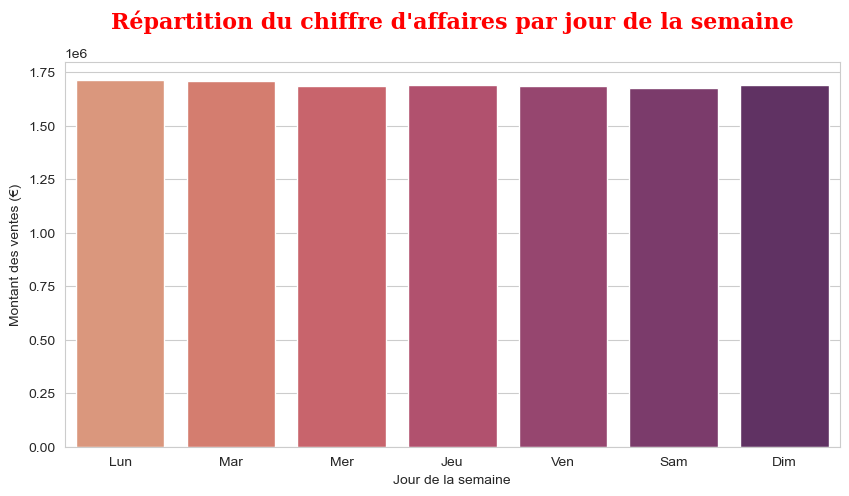

In [103]:
# Visualisation des ventes par jour de la semaine
CA_jour = data_final.groupby(data_final["date"].dt.dayofweek)["price"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x = CA_jour["date"], y = CA_jour["price"], data = CA_jour, palette = "flare")
plt.title("Répartition du chiffre d'affaires par jour de la semaine\n", fontdict = font_title)
plt.ylabel("Montant des ventes (€)")
plt.xlabel("Jour de la semaine")
plt.xticks(np.arange(0,7), ['Lun','Mar','Mer','Jeu','Ven','Sam','Dim'], rotation='horizontal')
plt.show()

In [104]:
# calculer les ventes par jour de la semaine
df_jour = data_final.groupby(data_final["date"].dt.dayofweek)["session_id"].count().sort_values(ascending=False).reset_index()
df_jour

,date,session_id
0,1,98335
1,0,97760
2,2,97402
3,6,97254
4,3,96651
5,4,96076
6,5,95854


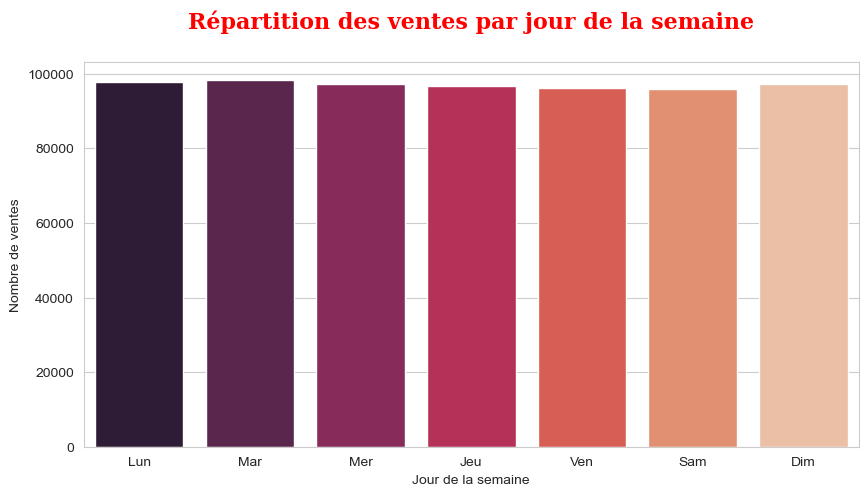

In [105]:
# Visualisation des ventes par jour de la semaine
df_jour = data_final.groupby(data_final["date"].dt.dayofweek)["session_id"].count().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x = df_jour["date"], y = df_jour["session_id"], data = df_jour, palette = "rocket")
plt.title("Répartition des ventes par jour de la semaine\n", fontdict = font_title)
plt.ylabel("Nombre de ventes")
plt.xlabel("Jour de la semaine")
plt.xticks(np.arange(0,7), ['Lun','Mar','Mer','Jeu','Ven','Sam','Dim'], rotation='horizontal')
plt.show()

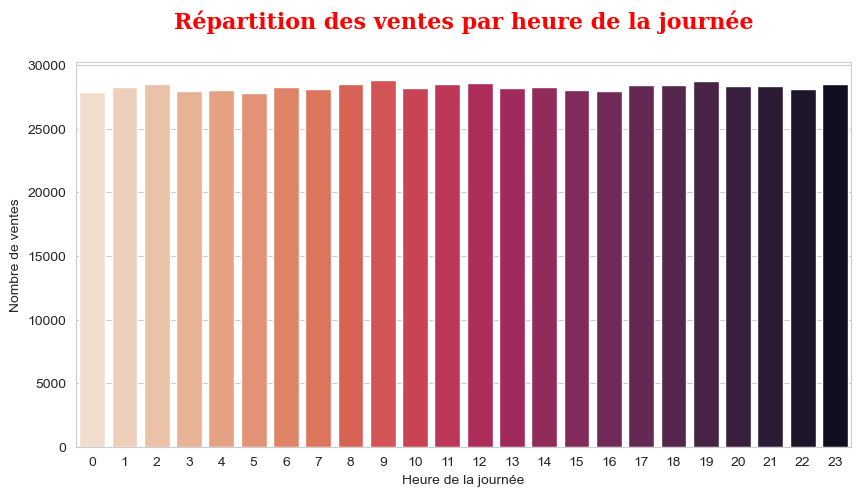

In [106]:
# Visualisation des ventes par heure de la journée
df_heure = data_final.groupby(data_final["date"].dt.hour)["session_id"].count().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x = df_heure["date"], y = df_heure["session_id"], data = df_heure, palette = "rocket_r")
plt.title("Répartition des ventes par heure de la journée\n", fontdict = font_title)
plt.ylabel("Nombre de ventes")
plt.xlabel("Heure de la journée")
plt.show()

* Nous contatons que les jour où il y'a le plus de ventes sont les lundis, mardis et dimanches et c'est génaralement entre les 9h du matin et 19h le soir;
* Pour lancer les campagnes de publicitaires et obtenir le plus de ventes.

### 3.1.d) Chiffre d'affaire par catégories de livres et total des ventes

* Nous allons voir la catégorie de produits qui réalise le plus de ventes et chiffre d'affaires.
* Nous allons renommer les colonnes les valeurs de la colonne.

In [107]:
# CA par catégories de livres
CA_categories = data_final.groupby(["categ"])["price"].sum().sort_values(ascending = False).reset_index()
CA_categories

,categ,price
0,categ_1,4653722.69
1,categ_0,4421938.76
2,categ_2,2780275.02


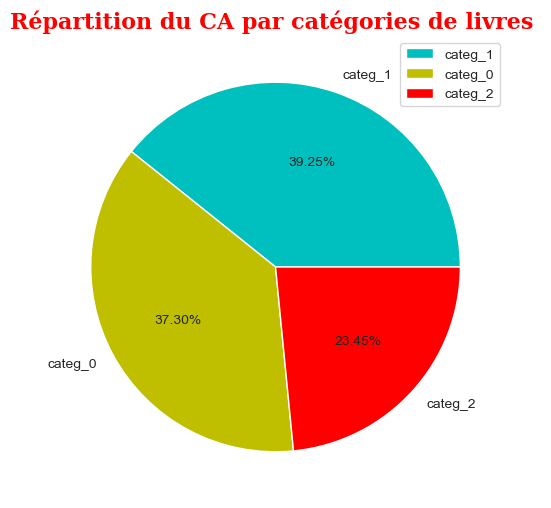

In [108]:
# visualisation de la CA par catégories de livres
plt.figure(figsize = (6,6))
labels = ["categ_1", "categ_0", "categ_2"]
plt.pie(data_final.groupby(["categ"])["price"].sum().sort_values(ascending = False), labels = labels, colors = ["c", "y", "r"],
        normalize = True,
        autopct = "%1.2f%%")
plt.title("Répartition du CA par catégories de livres ", fontdict = font_title)
plt.legend()
plt.show()

In [109]:
# Total des ventes par catégorie de livres
TV_categories = data_final.groupby(["categ"])["session_id"].count().sort_values(ascending=False).reset_index()
TV_categories

,categ,session_id
0,categ_0,415680
1,categ_1,227169
2,categ_2,36483


* Nous obtenons la catégorie (categ_1) comme étant le meilleur avec un total de chiffre d'affaires égal à 4653722.69euros et un total des ventes de 227169 livres pour une année.
* Nous allons calculer le chiffre d'affaire et le nombre total des ventes mensuelles par catégorie de livres
* Ainsi obtenir lequel des catégories de livres les plus achetés par mois (c'est à dire les catégories achetés par périodicité).

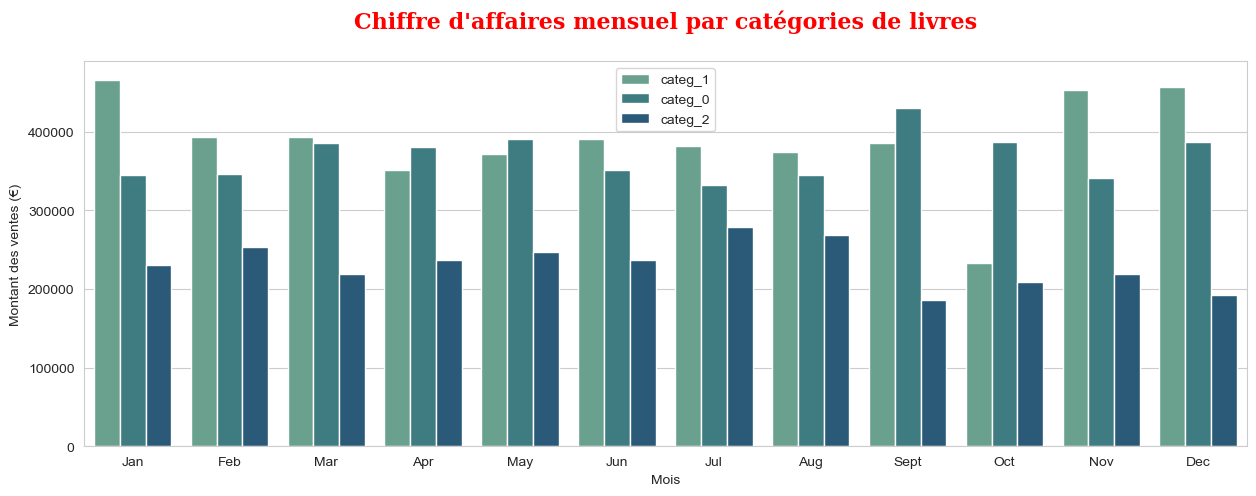

In [110]:
CA_categories = data_final.groupby(["mois", "categ"])["price"].sum().sort_values(ascending = False).reset_index()

# Visualisation du chiffre d'affaires mensuel par catégories de livres
plt.figure(figsize=(15, 5))
sns.barplot(x = CA_categories["mois"], y = CA_categories["price"], hue = "categ", data = CA_categories, palette = "crest")
plt.title("Chiffre d'affaires mensuel par catégories de livres\n", fontdict = font_title)
plt.ylabel("Montant des ventes (€)")
plt.xlabel("Mois")
plt.xticks(np.arange(0,12), ['Jan','Feb','Mar','Apr','May','Jun',
                             'Jul','Aug','Sept','Oct','Nov','Dec'], 
           rotation='horizontal')
plt.legend()
plt.show()

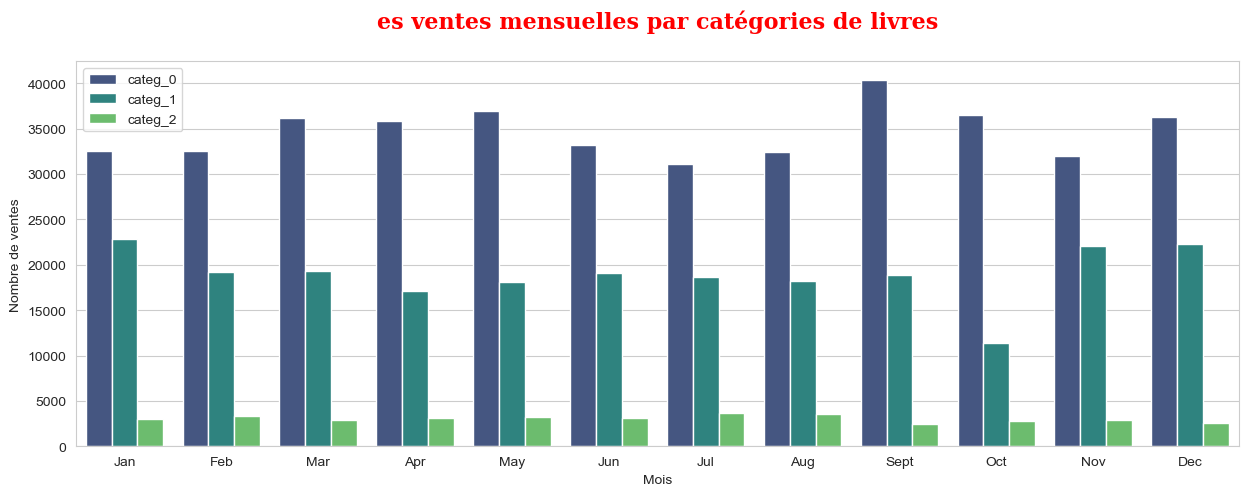

In [111]:
# Visualisation du nombre de ventes
TV_categories = data_final.groupby([(data_final["date"].dt.month), "categ"])["session_id"].count().sort_values(ascending = False).reset_index()

plt.figure(figsize=(15, 5))
sns.barplot(x = TV_categories["date"], y = TV_categories["session_id"], hue = "categ", data = TV_categories, palette = "viridis")
plt.title("es ventes mensuelles par catégories de livres\n", fontdict = font_title)
plt.ylabel("Nombre de ventes")
plt.xlabel("Mois")
plt.xticks(np.arange(0,12), ['Jan','Feb','Mar','Apr','May','Jun',
                             'Jul','Aug','Sept','Oct','Nov','Dec'], 
           rotation='horizontal')
plt.legend()
plt.show()

La périodicité des achats présente des points communs en fonction des catégories là encore :

* la catégorie 0 est surtout achetée au mois de septembre
* la catégorie 1 à partir de novembre, décembre jusqu'en janvier
* la catégorie 2 au mois de février et juillet

* Nous allons maintenant calculer le chiffre d'affaires et le montant des ventes par catégorie de produits pendant les 24 mois (2ans) depuis la création du site (c'est à dire étudier chaque année au lieu de les grouper mais de les détailler pour chaque mois de l'année) pour en savoir plus sur octobre 2021 la raison de la chute du CA.
* Pour cela nous allons creer un tableau croisé dynamique avec la fonction "pivot_table".

In [112]:
# Création du tableau croisé dynamique
data_mensuel = data_final.pivot_table(values = ["price", "session_id"],
                                      index = ["année", "mois"],
                                      columns = ["categ"],
                                      aggfunc = {"price": "sum",
                                                "session_id": "count"}).reset_index()

# afficher le tableau croisé
data_mensuel.columns = ["année", "mois", "categ_0", "categ_1", "categ_2", "vente_categ_0", "vente_categ_1", "vente_categ_2"]
data_mensuel.head(5)

,année,mois,categ_0,categ_1,categ_2,vente_categ_0,vente_categ_1,vente_categ_2
0,2021,3,193719.08,186974.17,101837.27,18140,9134,1336
1,2021,4,205362.32,156138.35,114748.49,19356,7579,1522
2,2021,5,196266.64,165893.40,130863.35,18509,8107,1677
3,2021,6,168013.08,189162.04,126983.37,15905,9264,1688
4,2021,7,144790.75,188523.27,149561.34,13582,9169,1991


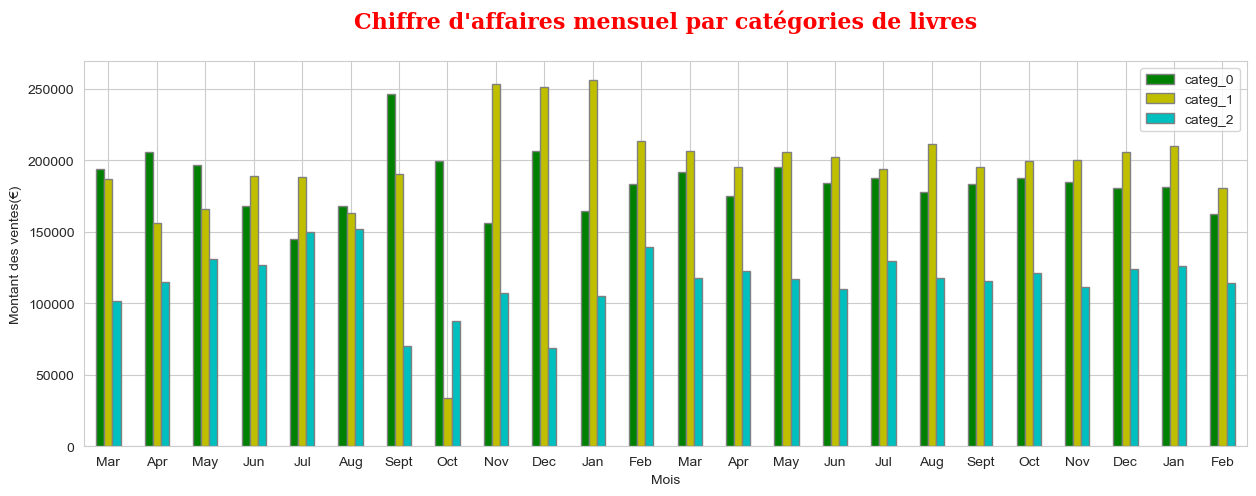

In [113]:
# Visualisation du chiffre d'affaires
data_mensuel1 = data_mensuel[["categ_0", "categ_1", "categ_2"]]

data_mensuel1.plot.bar(figsize=(15, 5), color = ["g","y","c"] , linewidth = 1, edgecolor ='grey')
plt.title("Chiffre d'affaires mensuel par catégories de livres\n", fontdict = font_title)
plt.ylabel("Montant des ventes(€)")
plt.xlabel("Mois")
plt.xticks(np.arange(0,24), ['Mar','Apr','May','Jun',
                             'Jul','Aug','Sept','Oct','Nov','Dec',
                            'Jan','Feb','Mar','Apr','May','Jun',
                             'Jul','Aug','Sept','Oct','Nov','Dec',
                            'Jan','Feb'], 
           rotation='horizontal')
plt.legend()
plt.show()

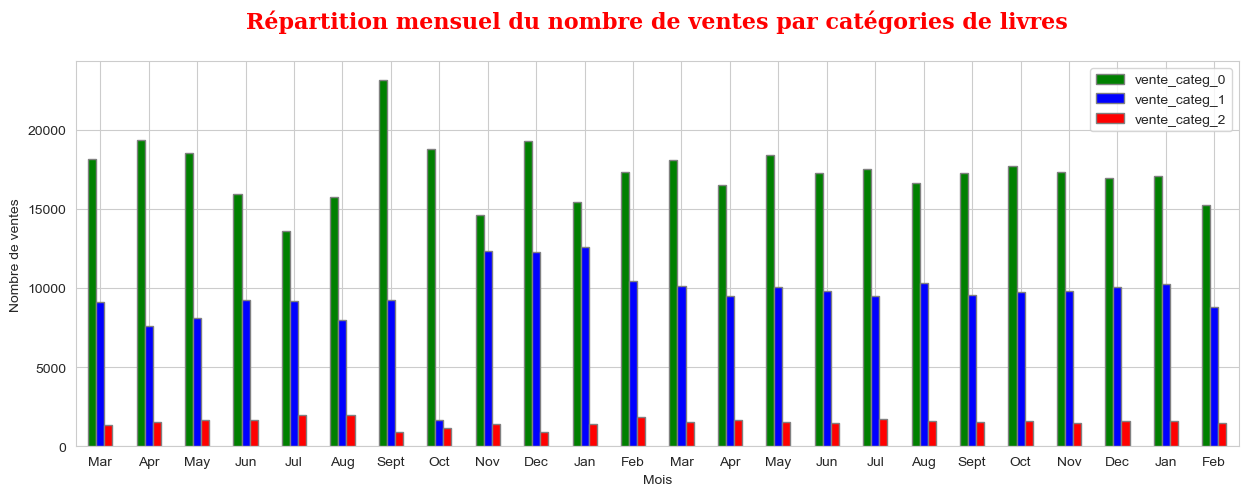

In [114]:
# Visualisation du nombre de ventes
# ["c","g","y"]
vente_mensuel2 = data_mensuel[["vente_categ_0", "vente_categ_1", "vente_categ_2"]]

vente_mensuel2.plot.bar(figsize=(15, 5), color = ["g","b","r"] , linewidth = 1, edgecolor ='grey')
plt.title("Répartition mensuel du nombre de ventes par catégories de livres\n", fontdict = font_title)
plt.ylabel("Nombre de ventes")
plt.xlabel("Mois")
plt.xticks(np.arange(0,24), ['Mar','Apr','May','Jun',
                             'Jul','Aug','Sept','Oct','Nov','Dec',
                            'Jan','Feb','Mar','Apr','May','Jun',
                             'Jul','Aug','Sept','Oct','Nov','Dec',
                            'Jan','Feb'], 
           rotation='horizontal')
plt.legend()
plt.show()

* Nous constatons une chute du chiffre d'affaires et le nombre de ventes des livres de la catégorie 1 au mois d'octobre 2021.
* Pour cela nous allons faire une étude plus en détail sur l'année et le mois d'octobre 2012 en créant un mask.
* Ensuite faire grouper le CA et le nombre de ventes par catégories de produits et jour du mois.

In [115]:
data_final.head(2)

,id_prod,date,session_id,client_id,sex,birth,age,price,categ,année,mois,jour_du_mois
0,0_1518,2022-05-20 13:21:29,s_211425,c_103,f,1986,37,4.18,categ_0,2022,5,20
1,0_1518,2021-07-20 13:21:29,s_64849,c_103,f,1986,37,4.18,categ_0,2021,7,20


In [116]:
# création du dataframe du mois d'octobre pour l'année 2021
data_octobre = data_final.loc[(data_final["année"] == 2021) & (data_final["mois"] == 10), ["session_id", "price", "categ", "jour_du_mois"]]
data_octobre.head(5)

,session_id,price,categ,jour_du_mois
6,s_109153,4.18,categ_0,23
27,s_104281,4.18,categ_0,13
31,s_106465,4.18,categ_0,18
75,s_100641,4.18,categ_0,6
98,s_103594,4.18,categ_0,12


In [117]:
# calculer le CA et le nombre de vente par catégories et jour du mois 
df_octobre = data_octobre.groupby(["jour_du_mois", "categ"]).agg({"price": "sum",
                                                                 "session_id" : "count"}).sort_values(by = "session_id",ascending = False).reset_index()

# renommer les colonnes 
df_octobre.columns = ["jour_du_mois", "categ", "CA", "Nombre_de_Ventes"]
df_octobre.head(5)

,jour_du_mois,categ,CA,Nombre_de_Ventes
0,6,categ_0,7546.58,702
1,8,categ_0,7069.53,669
2,1,categ_0,6950.50,663
3,16,categ_0,6898.14,661
4,2,categ_0,7141.01,661


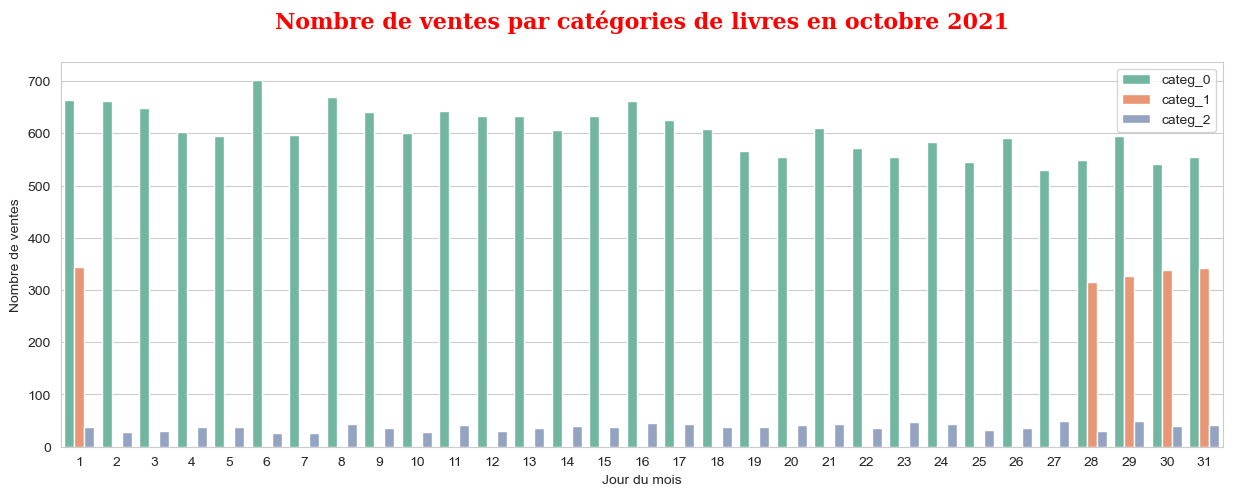

In [118]:
# Faire la visualisation
plt.figure(figsize=(15, 5))
sns.barplot(x = df_octobre["jour_du_mois"], y = df_octobre["Nombre_de_Ventes"], hue = "categ", data = df_octobre, palette = "Set2")
plt.title("Nombre de ventes par catégories de livres en octobre 2021\n", fontdict = font_title)
plt.ylabel("Nombre de ventes")
plt.xlabel("Jour du mois")
plt.legend()
plt.show()

* Nous constatons qu'il n'y a pas eu de ventes des livres de la catégorie 1 à partir du 1 Octobre au 28 Octobre 2021, par contre les ventes restent constante pour la catégorie 0 et 2.
* Pour cela c'est possible de favoriser les produits de la catégorie 2 même si les ventes ne sont pas elevés mais il y'a eu des ventes durant tout le mois d'octobre
* Nous allons calculer le nombre d'achats et le montant du CA moyen par jour, mois et année.

In [119]:
# Création du tableau croisé dynamique
df_mensuel = data_final.pivot_table(values = ["price", "session_id"],
                                      index = ["année", "mois","jour_du_mois"],
                                      columns = ["categ"],
                                      aggfunc = {"price": "sum",
                                                "session_id": "count"}).reset_index()

# afficher le tableau croisé
df_mensuel.columns = ["année", "mois", "jour", "categ_0", "categ_1", "categ_2", "vente_categ_0", "vente_categ_1", "vente_categ_2"]
df_mensuel.head(5)

,année,mois,jour,categ_0,categ_1,categ_2,vente_categ_0,vente_categ_1,vente_categ_2
0,2021,3,1,6272.64,6811.53,3491.04,582.0,335.0,46.0
1,2021,3,2,6728.26,5627.15,3141.03,621.0,276.0,43.0
2,2021,3,3,6121.03,5691.41,3386.25,591.0,280.0,40.0
3,2021,3,4,5891.48,6098.98,3205.61,563.0,297.0,43.0
4,2021,3,5,5975.97,7071.21,4424.19,561.0,331.0,51.0


In [120]:
# calculer le CA journalière
CA_jour = df_mensuel.groupby(["année","mois", "jour"])["categ_0", "categ_1", "categ_2"].sum().mean().sort_values(ascending = False).reset_index()

# renommer les colonnes
CA_jour.columns = ["categories", "CA"]

# afficher le résultat
CA_jour

,categories,CA
0,categ_1,6374.962589
1,categ_0,6057.450356
2,categ_2,3808.595918


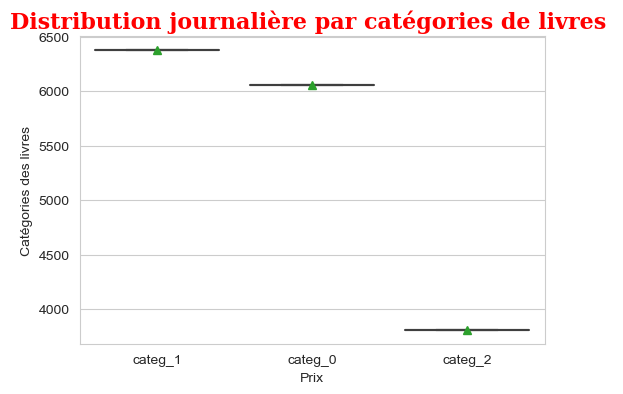

In [121]:
# visualisation du prix moyen par catégorie de livres 
plt.figure(figsize = (6,4))
sns.boxplot(y = CA_jour["CA"], x = CA_jour["categories"], data = CA_jour, orient = "v", showfliers=False, showmeans=True, palette = "Paired")
plt.xlabel("Prix")
plt.ylabel("Catégories des livres")
plt.title("Distribution journalière par catégories de livres ", fontdict = font_title)
plt.show()

In [122]:
# calculer le total des ventes journalière
TV_jour = df_mensuel.groupby(["année","mois", "jour"])["vente_categ_0", "vente_categ_1", "vente_categ_2"].sum().mean().sort_values(ascending = False).reset_index()

# renommer les colonnes
TV_jour.columns = ["categories", "TV"]

# afficher le résultat
TV_jour

,categories,TV
0,vente_categ_0,569.424658
1,vente_categ_1,311.190411
2,vente_categ_2,49.976712


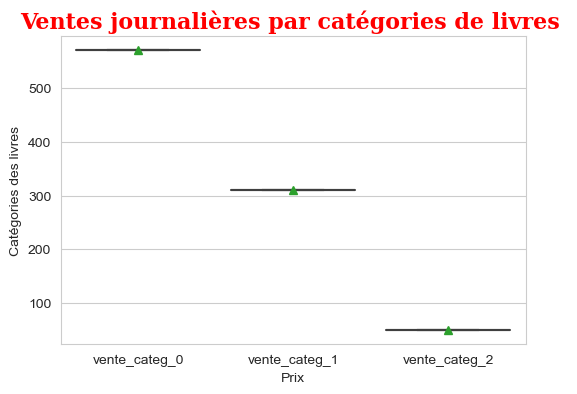

In [123]:
# visualisation du prix moyen par catégorie de livres 
plt.figure(figsize = (6,4))
sns.boxplot(y = TV_jour["TV"], x = TV_jour["categories"], data = TV_jour, orient ='v', showfliers=False, showmeans=True, palette = "Paired")
plt.xlabel("Prix")
plt.ylabel("Catégories des livres")
plt.title("Ventes journalières par catégories de livres ", fontdict = font_title)
plt.show()

### 3.2 Saisonnalité et tendance

* Nous allons mettre en place une décomposition en moyenne mobile pour évaluer la tendance globale.

729 days 23:57:23


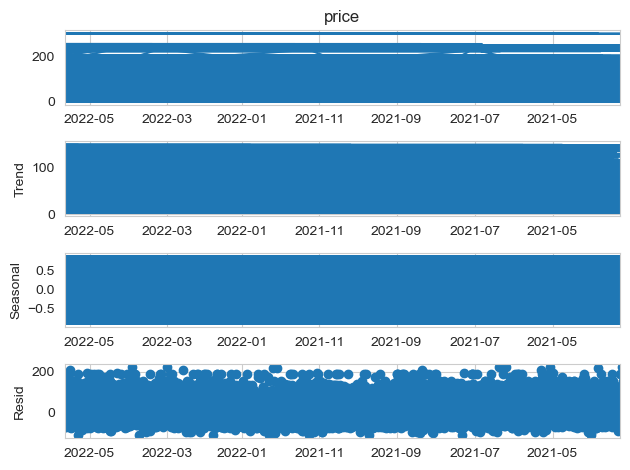

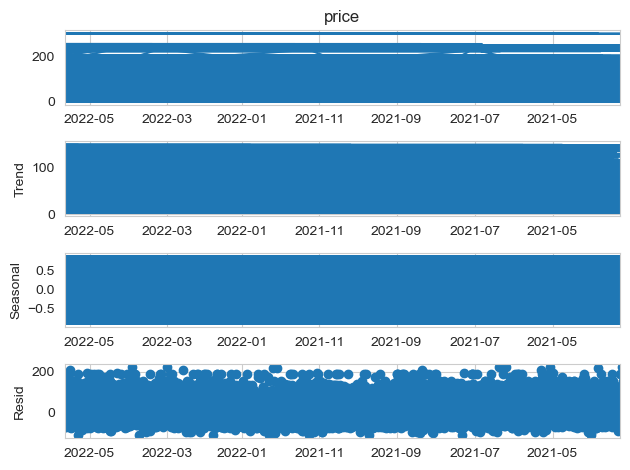

In [124]:
# faire une copie
f_final = data_final.copy()

# réinitialiser l'index
f_final.reset_index(inplace=True)
# convertir au format date
f_final["date"] = pd.to_datetime(f_final["date"])
# Définir l'index du dataframe à partir de la colonne "date"
f_final = f_final.set_index("date")

# Définir la période
periode = data_final["date"].max() - data_final["date"].min()
print(periode)

# Définir une bloc
plt.rcParams['agg.path.chunksize'] = 10000

# le graphique
seasonal_decompose(f_final["price"], period = 729).plot()

* Nous obtenons une tendance nulle (pas de variations).
* Nous allons faire la décompostion manuellement pour comparer.

In [125]:
# faire une copie
ff_final = data_final.copy()

# calculer le chiffre d'affaires année mois
CA_mensuel = ff_final.groupby(["date","année","mois"])["price"].sum().sort_values(ascending = False).reset_index()

# Decomposition en moyenne mobile
CA_mensuel["trend"] = CA_mensuel["price"].rolling(window = 3).mean()

# detrendre la série
CA_mensuel["detrended"] = CA_mensuel["price"] - CA_mensuel["trend"]

# convertir au format date
CA_mensuel["date"] = pd.to_datetime(CA_mensuel["date"])
# Définir l'index du dataframe à partir de la colonne "date"
CA_mensuel = CA_mensuel.set_index("date")


# la saisonnalité
CA_mensuel["seasonality"] = CA_mensuel.groupby(["année", "mois"])["detrended"].transform("mean")

# obtenir les résidus
CA_mensuel["resid"] = CA_mensuel["detrended"] - CA_mensuel["seasonality"]

# afficher le dataframe
CA_mensuel.head(5)

,année,mois,price,trend,detrended,seasonality,resid
date,,,,,,,
2022-08-07 06:52:26,2022,8,300.0,NaN,NaN,-0.000504,NaN
2022-03-28 21:24:28,2022,3,300.0,NaN,NaN,-0.000220,NaN
2022-12-06 23:14:33,2022,12,300.0,300.0,0.0,-0.001529,0.001529
2021-12-07 06:52:26,2021,12,300.0,300.0,0.0,-0.000587,0.000587
2021-06-12 08:44:00,2021,6,300.0,300.0,0.0,-0.000306,0.000306


<Figure size 1800x600 with 0 Axes>

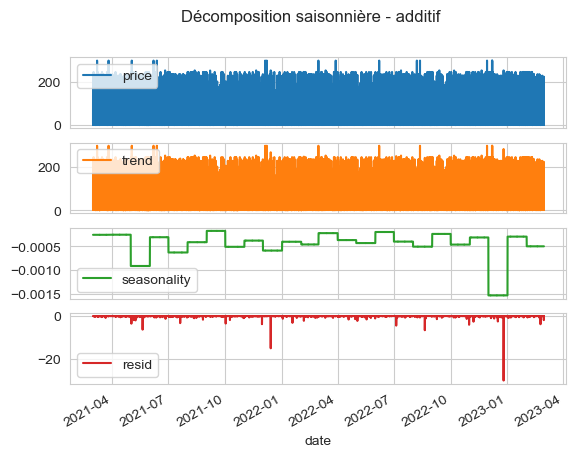

In [126]:
# visualisation
fig = plt.figure(figsize=(18, 6))
CA_mensuel.loc[:, ["price", "trend", "seasonality", "resid"]].plot(subplots = True, title = "Décomposition saisonnière - additif")
plt.show()

* Nous allons faire une décomposition en moyenne du chiffre d'affaires qui est une technique qui permet de calculer une moyenne mais plutôt que de faire la moyenne de toutes les valeurs que l'on aurait par exemple 2021, on va faire la moyenne sur une fenêtre de valeurs qu'on va définir puis calculer la moyenne . Par exemple pour une fenêtre de 3 mois ou jours (3 lignes = moyenne sur 3 lignes du CA) on va calculer la moyenne , puis se décaler d'un mois et recalculer la moyenne etc... 
* Cela nous permettra de mieux voir les tendances et ceux qui se passe avec nos données.

In [127]:
# calculer le chiffre d'affaires année mois
fff_final = data_final.copy()
CA_mensuel = fff_final.groupby(["année","mois"])["price"].sum()

# Decomposition en moyenne mobile
#CA_mensuel["MovingAverage"] = CA_mensuel.rolling(window = 3).mean()
MovingAverage = CA_mensuel.rolling(window = 3, center=True).mean()
print(MovingAverage)

année  mois
2021   3                 NaN
       4       483934.356667
       5       484477.013333
       6       486685.746667
       7       483136.183333
       8       490870.206667
       9       436867.976667
       10      448165.620000
       11      454374.503333
       12      522547.926667
2022   1       529019.180000
       2       525545.583333
       3       514795.536667
       4       508665.886667
       5       502172.430000
       6       508093.830000
       7       504512.080000
       8       503884.876667
       9       502923.100000
       10      499665.646667
       11      505023.980000
       12      508221.583333
2023   1       494879.870000
       2                 NaN
Name: price, dtype: float64


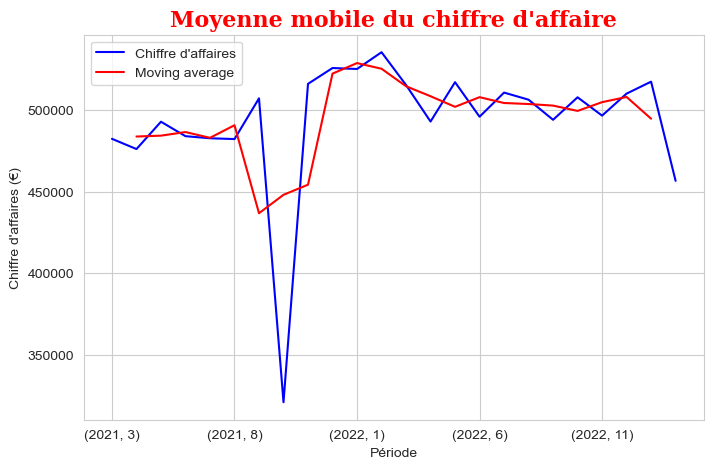

In [128]:
# Graphique:
fig = plt.figure(figsize=(8, 5))
CA_mensuel.plot(color = "blue", label = "Chiffre d'affaires")
MovingAverage.plot(color = "red", label = "Moving average")
plt.xlabel("Période")
plt.ylabel("Chiffre d'affaires (€)")
plt.title("Moyenne mobile du chiffre d'affaire", fontdict= font_title)
plt.legend()

* Nous observons au début le chiffre d'affaires étaient bonne jusqu'au septième mois (juillet 2021) ensuite une lègère baisse au huitième mois (août 2021).A partir du trézième mois (janvier 2022) , on observe une augmentation importante du chiffre d'affaires( toute l'année 2022).

### 3.1.e) Le chiffre d'affaire par tranche d'âge

* Nous allons faire un histogramme avec la colonne âge pour voir la distribution des âges, ensuite pour pouvoir créer une liste des tranche d'âge.

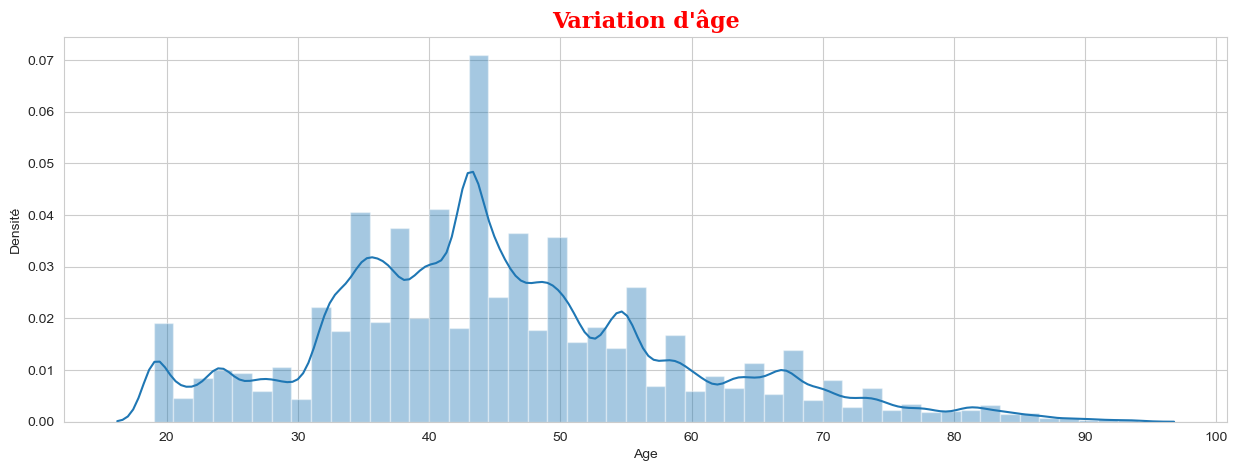

In [129]:
# visualisation de la distribution des âges
plt.figure(figsize=(15,5))
sns.distplot(data_final["age"], kde = True)
plt.xlabel("Age")
plt.ylabel("Densité")
plt.title("Variation d'âge", fontdict = font_title)
plt.show()

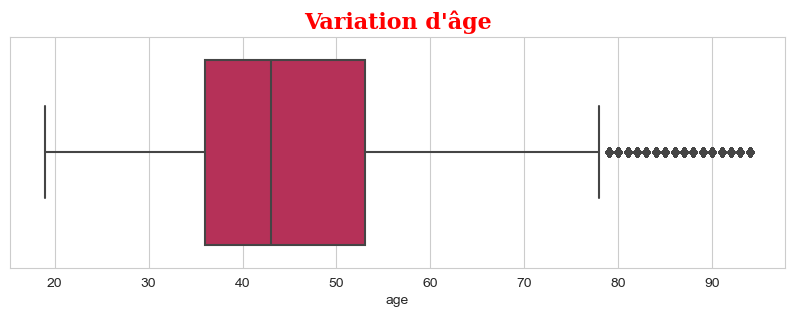

In [130]:
# visualisation de la distribution des âges
plt.figure(figsize=(10,3))
sns.boxplot(x = data_final["age"], palette = "rocket")
plt.title("Variation d'âge", fontdict = font_title)
plt.show()

* Nous obtenons une distribution unimodal, asymétrique vers la droite, avec une variation d'âge de 15 à 100ans des clients.
* Nous pouvons maintenant créer la liste de nos tranches d'âge (qu'on appelle du feature engineering) qui va nous permettre de faire des analyses avec un peu plus de sens.

In [131]:
# Création des catégories d'âge
data_final.loc[(data_final["age"] <= 15), "groupe_age"] = "Mineurs (<=15)"
data_final.loc[(data_final["age"] > 15) & (data_final["age"] <= 25), "groupe_age"] = "Adolescents (15-25ans)"
data_final.loc[(data_final["age"] > 25) & (data_final["age"] <= 35), "groupe_age"] = "Jeunes (25-35ans)"
data_final.loc[(data_final["age"] > 35) & (data_final["age"] <= 50), "groupe_age"] = "Juniors (35-50ans)"
data_final.loc[(data_final["age"] > 50), "groupe_age"] = "Seniors (50-100ans)"

In [132]:
# Afficher le dataframe
data_final.head(2)

,id_prod,date,session_id,client_id,sex,birth,age,price,categ,année,mois,jour_du_mois,groupe_age
0,0_1518,2022-05-20 13:21:29,s_211425,c_103,f,1986,37,4.18,categ_0,2022,5,20,Juniors (35-50ans)
1,0_1518,2021-07-20 13:21:29,s_64849,c_103,f,1986,37,4.18,categ_0,2021,7,20,Juniors (35-50ans)


* Nous allons utiliser la fontion "value_counts()" pour compter le nombre de clients dans chacune des catégories d'âge.

Juniors (35-50ans)        327319
Seniors (50-100ans)       196082
Jeunes (25-35ans)         108076
Adolescents (15-25ans)     47855
Name: groupe_age, dtype: int64
--------------------------------------------------------------
--------------------------------------------------------------


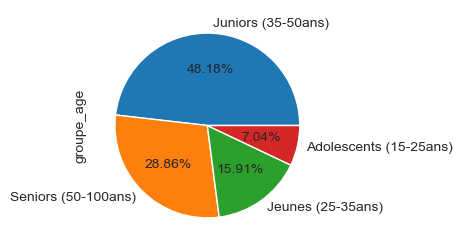

In [133]:
# Le nbre de clients pour chacune des catégories d'âge
print(data_final["groupe_age"].value_counts())

plt.figure(figsize=(8,3))
#data_final["groupe_age"].value_counts().plot.bar()
data_final["groupe_age"].value_counts().plot.pie(normalize = True,
        autopct = "%1.2f%%")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")

In [134]:
# Le chiffre d'affaires par catégories d'âges
CA_age = data_final.groupby(["groupe_age"])["price"].sum().sort_values(ascending = False).reset_index()
CA_age

,groupe_age,price
0,Juniors (35-50ans),4318568.43
1,Seniors (50-100ans),3232862.80
2,Jeunes (25-35ans),2296519.45
3,Adolescents (15-25ans),2007985.79


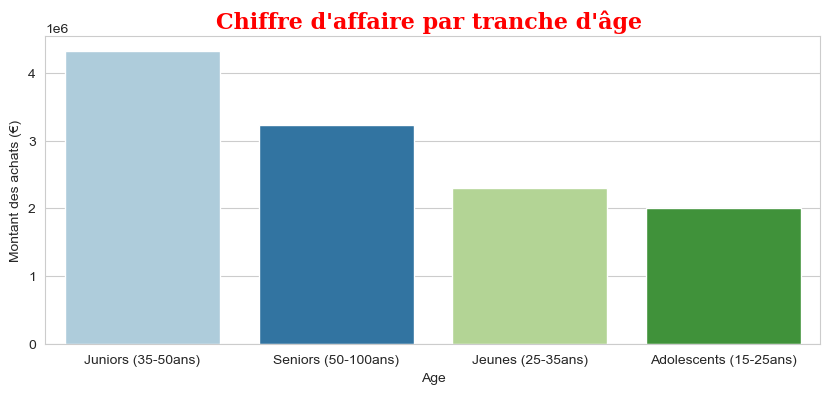

In [135]:
# Visualisation 
plt.figure(figsize = (10, 4))
sns.barplot(x = CA_age["groupe_age"], y = CA_age["price"], data = CA_age, palette = "Paired")
plt.xlabel("Age")
plt.ylabel("Montant des achats (€)")
plt.title("Chiffre d'affaire par tranche d'âge ", fontdict = font_title)
plt.show()

In [136]:
# Le nombre d'achats) par catégories d'âges
TV_age = data_final.groupby(["groupe_age"])["session_id"].count().sort_values(ascending = False).reset_index()
TV_age

,groupe_age,session_id
0,Juniors (35-50ans),327319
1,Seniors (50-100ans),196082
2,Jeunes (25-35ans),108076
3,Adolescents (15-25ans),47855


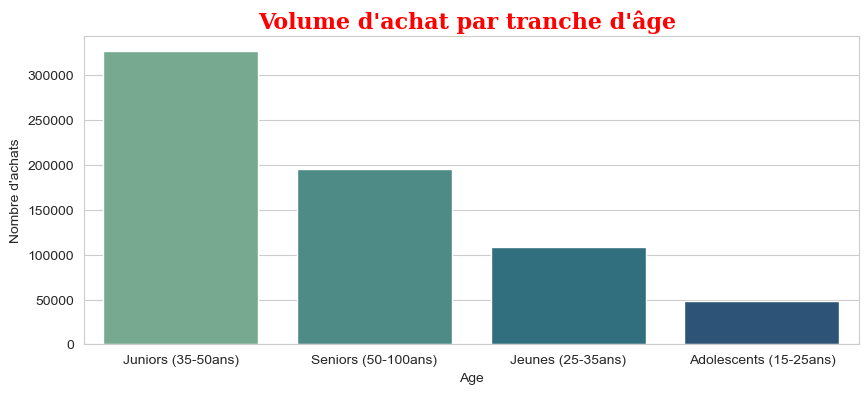

In [137]:
# Visualisation 
plt.figure(figsize = (10, 4))
sns.barplot(x = TV_age["groupe_age"], y = TV_age["session_id"], data = TV_age, palette = "crest")
plt.xlabel("Age")
plt.ylabel("Nombre d'achats")
plt.title("Volume d'achat par tranche d'âge ", fontdict = font_title)
plt.show()

* Nous obtenons 4318568.43euros de chiffre d'affaires des clients de la catégorie Juniors avec un total des ventes de 327319.

In [138]:
# comparer la moyenne du prix des catégories d'âge
# Le montant moyen des achats par catégories d'âge
CA_age_moy = data_final.groupby(["groupe_age"])["price"].mean().sort_values(ascending = False).reset_index()
CA_age_moy

,groupe_age,price
0,Adolescents (15-25ans),41.959791
1,Jeunes (25-35ans),21.249116
2,Seniors (50-100ans),16.487300
3,Juniors (35-50ans),13.193760


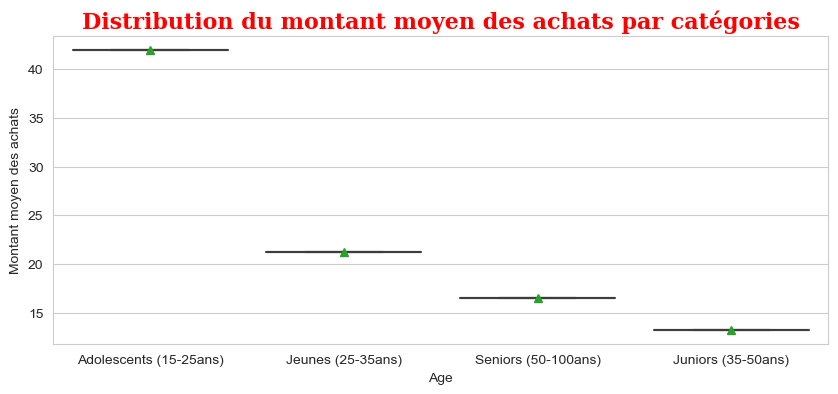

In [139]:
# visualisation du prix moyen par catégorie de livres 
plt.figure(figsize = (10,4))
sns.boxplot(x = CA_age_moy["groupe_age"], y = CA_age_moy["price"], orient = "v", data = CA_age_moy, showfliers = False, showmeans=True)
plt.xlabel("Age")
plt.ylabel("Montant moyen des achats")
plt.title("Distribution du montant moyen des achats par catégories", fontdict = font_title)
plt.show()

* Nous obtenons en moyenne 41,95% du chiffre d'affaires des clients de la catégories Adolescents, cela veut dire qu'il dépense le plus en moyenne des achats par rapport aux autres catégories d'âge (les juniors qui nous rapportent le moins) ; 
* Pour cela nous allons cibler aux prochaines campagnes marketing les Adolescents (15-25ans).

## 3.2 Zoom sur les références des produits

### 3.2.1 Références des livres

* Nous allons voir les produits (livres) les plus achetés et les moins achetés sur le site.

In [140]:
# Top 10 des livres les plus achetés
top_10 = data_final.groupby(["id_prod", "categ"])["session_id"].count().sort_values(ascending = False).reset_index()
top_10.head(10)

,id_prod,categ,session_id
0,1_369,categ_1,2252
1,1_417,categ_1,2189
2,1_414,categ_1,2180
3,1_498,categ_1,2128
4,1_425,categ_1,2096
5,1_403,categ_1,1960
6,1_412,categ_1,1951
7,1_413,categ_1,1945
8,1_406,categ_1,1939
9,1_407,categ_1,1935


In [141]:
# Top 10 des livres les moins achetés
tail_10 = data_final.groupby(["id_prod", "categ"])["session_id"].count().sort_values(ascending = False).reset_index()
tail_10.tail(10)

,id_prod,categ,session_id
3256,0_2201,categ_0,1
3257,0_1151,categ_0,1
3258,0_1728,categ_0,1
3259,2_81,categ_2,1
3260,0_1539,categ_0,1
3261,0_1284,categ_0,1
3262,0_549,categ_0,1
3263,0_1498,categ_0,1
3264,0_541,categ_0,1
3265,0_886,categ_0,1


* Nous constatons que le top 10 des livres les plus achetés appartiennet à la catégories 1 tandisque les moins vendus appartiennent à la catégories 0;
* Pour cela nous allons voir le nombre de livres que nous avons par catégorie ainsi le prix moyen d'un livre par catégorie.
* Nous allons faire une courbe de Lorenz qui est une représentation graphique d'une distribution. Elle permet de calculer le coef de Gini qui mesure l'inégalité de cette variable.
##### plus l'indice est proche de 0 , plus la distribution est égalitaire
##### plus l'indice est proche de 1 , plus la distribution est inégalitaire

In [142]:
# Fonction pour tracer Courbe de lorenz

def lorenz(variable, title, xlabel, ylabel):
    # tirer les valeurs et copie triée des valeurs du dataframe
    X = variable.values
    X = np.sort(X)

    # Indice de Gini
    def gini(arr):
        # Premier tri
        sorted_arr = arr.copy()
        sorted_arr.sort()
        n = arr.size
        coef_ = 2. / n
        const_ = (n + 1.) / n
        weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
        return coef_*weighted_sum/(sorted_arr.sum()) - const_
    print('Incide de Gini :', round(gini(X), 3))

    # Courbe de Lorenz
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0)
    X_lorenz[0], X_lorenz[-1]

    # Nuages de points de la courbe de Lorenz
    fig, ax = plt.subplots(figsize=[5,4])
    ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
               marker = 'x', color ='darkblue', s = 20)
    # Tracé linéaire de l'égalité = diagonale
    fontdict = font_title
    ax.plot([0,1], [0,1], color ='k')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, fontdict = font_title)
    plt.show()

Incide de Gini : 0.694


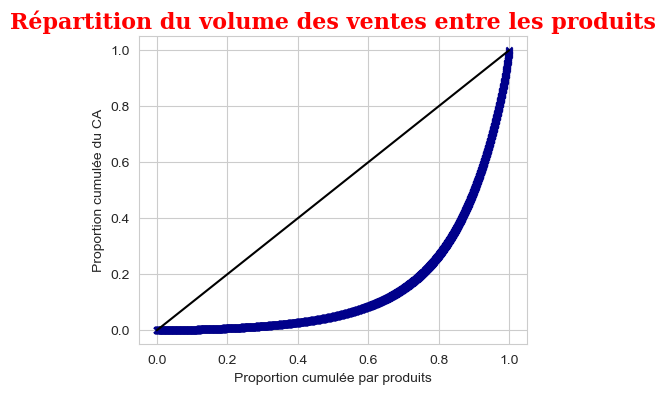

In [143]:
# le top des meilleurs ventes
top_vente = data_final.groupby(["id_prod"])["session_id"].count().sort_values(ascending = False).reset_index()

# appel à la fonction
lorenz(top_vente["session_id"], "Répartition du volume des ventes entre les produits", "Proportion cumulée par produits", "Proportion cumulée du CA")

Incide de Gini : 0.743


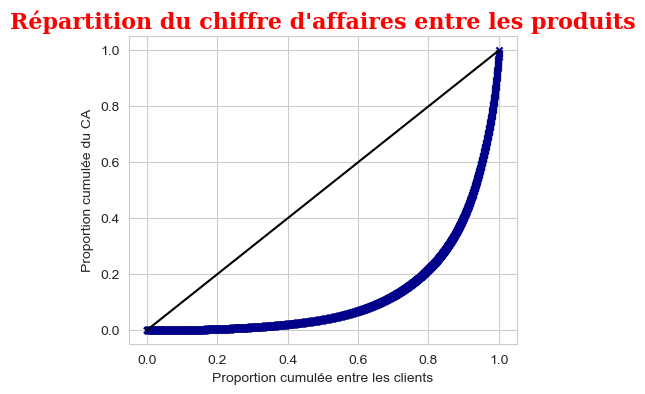

In [144]:
# le top des meilleurs ventes
top_vente = data_final.groupby(["id_prod"])["price"].sum().sort_values(ascending = False).reset_index()

# appel à la fonction
lorenz(top_vente["price"], "Répartition du chiffre d'affaires entre les produits", "Proportion cumulée entre les clients", "Proportion cumulée du CA")

* Nous obtenons les indices Gini égale à 69% (volume des ventes) et 74% (chiffre d'affaires entre les produits) proche de 1, pour cela nous pouvons dire la distribution est inégalitaire c'ést à dire le chiffre d'affaires est concentré sous peu de produits.
* Cela veut dire que le prix des catégories de produits est inégale dans le chiffre d'affaires.

### 3.2.2 La répartition par catégorie de livres 

In [145]:
# Le nombre de livres par catégories
categ_livre = data_final.groupby(["categ"])["id_prod"].count().sort_values(ascending = False).reset_index()
categ_livre

,categ,id_prod
0,categ_0,415680
1,categ_1,227169
2,categ_2,36483


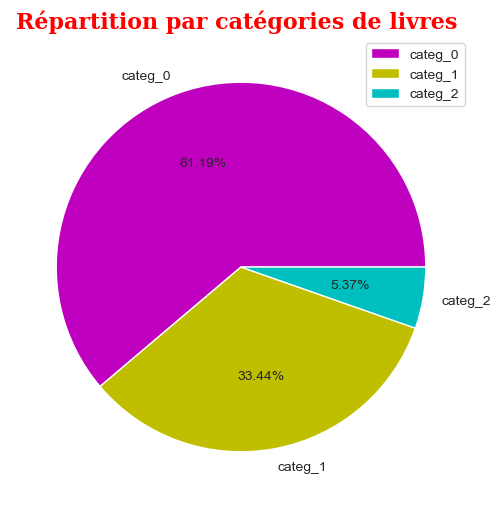

In [146]:
# visualisation de la répartition des ventes par catégories de livres
plt.figure(figsize = (6,6))
labels = ["categ_0", "categ_1", "categ_2"]
plt.pie(data_final.groupby(["categ"])["id_prod"].count().sort_values(ascending = False), labels = labels, colors = ["m", "y", "c"],
        normalize = True,
        autopct = "%1.2f%%")
plt.title("Répartition par catégories de livres ", fontdict = font_title)
plt.legend()
plt.show()

In [147]:
# Le prix moyen par catégories de livres
prix_moy_categ = data_final.groupby(["categ"])["price"].mean().sort_values(ascending = False).reset_index()
prix_moy_categ

,categ,price
0,categ_2,76.207412
1,categ_1,20.485730
2,categ_0,10.637843


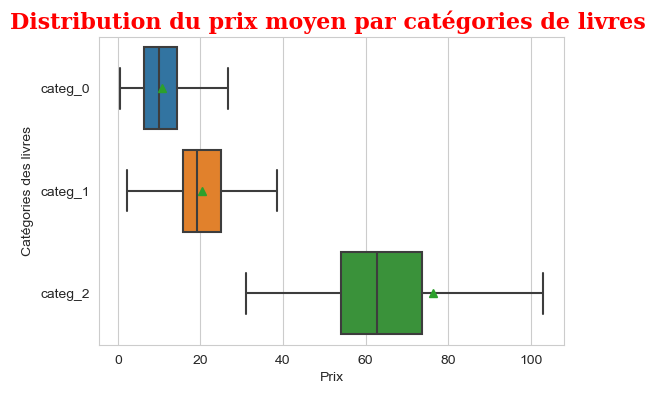

In [148]:
# visualisation du prix moyen par catégorie de livres 
plt.figure(figsize = (6,4))
sns.boxplot(y = data_final["categ"], x = data_final["price"], data = data_final, orient ='h', showfliers=False, showmeans=True)
plt.xlabel("Prix")
plt.ylabel("Catégories des livres")
plt.title("Distribution du prix moyen par catégories de livres ", fontdict = font_title)
plt.show()

* Les catégories 1 coûtent en moyenne 20euros ce qui marquent la différence par rapport aux catégories 2 qui coûtent en moyenne 76euros.
* Ce qui fait que les meilleurs ventes de livres se font sur la catégorie 1.

## 3.3. Profil des clients

* Nous allons calculer le montant et nombre d'achats moyen ainsi le chiffre d'affaire par client depuis l'ouverture du site en ligne.

### 3.3.1 Le montant et nombre d'achats moyen par client

In [149]:
# Calculer le montant moyen d'achats par client
montant_achat = data_final.groupby(["client_id"])["price"].sum().mean()

print(f" Le montant moyen d'achats par client est de : {montant_achat} ")

 Le montant moyen d'achats par client est de : 1378.597263953488 


In [150]:
# Calculer le nombre moyen d'achats par client
nombre_achat = data_final.groupby(["client_id"])["session_id"].count().mean()

print(f" Le nombre d'achats moyen par client est de : {nombre_achat} ")

 Le nombre d'achats moyen par client est de : 78.99209302325582 


### 3.3.2 Répartition du chiffre d'affaires par client

In [151]:
# calculer le chiffre d'affaires par client(montant d'achat par client)
CA_age_client = data_final.groupby(["client_id","sex","age"])["price"].sum().sort_values(ascending = False).reset_index()
CA_age_client.head(11)

,client_id,sex,age,price
0,c_1609,m,43,324033.35
1,c_4958,m,24,289760.34
2,c_6714,f,55,153658.86
3,c_3454,m,54,113667.90
4,c_3263,f,38,5276.87
5,c_1570,f,44,5271.62
6,c_2899,f,29,5214.05
7,c_2140,f,46,5208.82
8,c_7319,f,49,5155.77
9,c_8026,m,45,5092.57


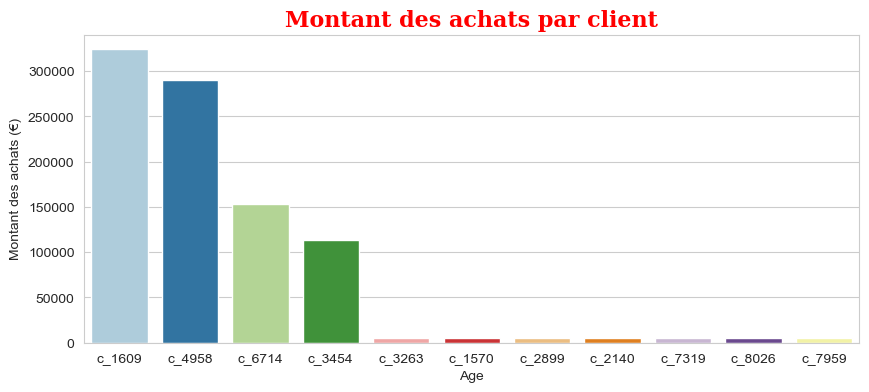

In [152]:
# Visualisation 
A = CA_age_client[CA_age_client["price"] >= 5082.58]
plt.figure(figsize = (10, 4))
sns.barplot(x = A["client_id"], y = A["price"], data = A, palette = "Paired")
plt.xlabel("Age")
plt.ylabel("Montant des achats (€)")
plt.title("Montant des achats par client", fontdict = font_title)
plt.show()

* Nous constatons la présence de quatre clients avec les meilleurs chiffres d'affaires variant de 113637.93 à 324033.35euros.
* C'est possible qu'ils soient des revendeurs de livres (librairie ou bibliothécaire).
* Nous allons observer le volume des achats par catégories de livres ces 4 quatres clients.

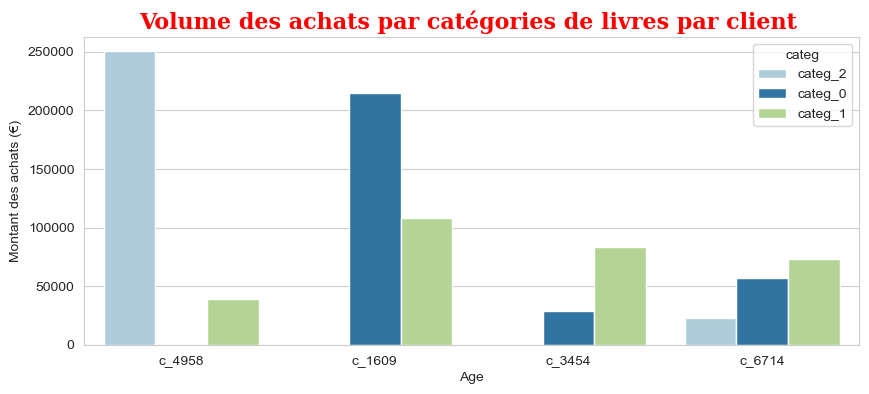

In [153]:
# calculer le chiffre d'affaires par client
CA_client = data_final.groupby(["client_id","sex","categ", "age"])["price"].sum().sort_values(ascending = False).reset_index()

# Visualisation 
A = CA_client[CA_client["price"] >= 5082.58]
plt.figure(figsize = (10, 4))
sns.barplot(x = A["client_id"], y = A["price"], hue = "categ", data = A, palette = "Paired")
plt.xlabel("Age")
plt.ylabel("Montant des achats (€)")
plt.title("Volume des achats par catégories de livres par client ", fontdict = font_title)
plt.show()

* Nous constatons que le client qui fait le plus du chiffre d'affaires (cliend_id = c_1609) achéte plus les catégories 1 par rapport au client (client_id = c_4958) qui achéte les livres de la catégorie 2 les plus chers.
* Pour cela nous allons une courbe de lorenz pour montrer l'inégalité dans la série en calculant le coef de Gini.

Incide de Gini : 0.446


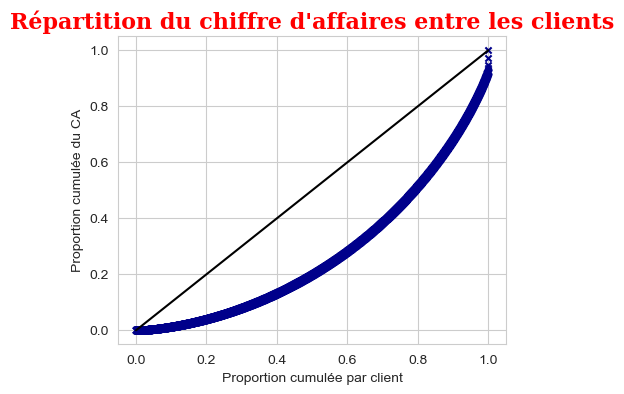

In [154]:
# Appel à la fonction
lorenz(CA_age_client["price"], "Répartition du chiffre d'affaires entre les clients", "Proportion cumulée par client", "Proportion cumulée du CA")

* Nous obtenons une indice de Gini égale à 0,446 (faible) proche de 0, ce qui veut dire que la distribution est égalitaire.
* Cela est normale du fait des 4 clients qui font les plus d'achats,
* Nous allons exclure ces 4 clients.

Incide de Gini : 0.403


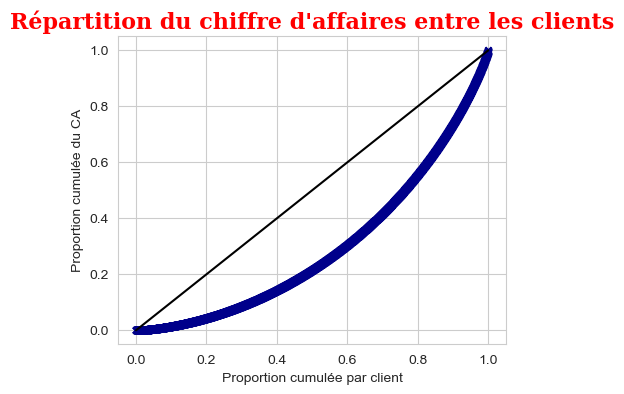

In [155]:
# suppression des quatres clients
CA_age_client = CA_age_client.drop(index = [0,1,2,3])

# Appel à la fonction
lorenz(CA_age_client["price"], "Répartition du chiffre d'affaires entre les clients", "Proportion cumulée par client", "Proportion cumulée du CA")

* Nous observons une indice plus faible après suppressions de ces 4 professionnels.
* Cela veut dire que le chiffre d'affaire ne se concentre que sur ces 4 clients professionnels

# 4. Analyse plus ciblée sur les clients

* Nous allons faire des analyses pour mieux connaitre le comportement de nos clients.

In [156]:
# Faire une copie du dataframe pour répondres aux demandes de julie
df = data_final.copy()

# Afficher le dataframe
df.head(2)

,id_prod,date,session_id,client_id,sex,birth,age,price,categ,année,mois,jour_du_mois,groupe_age
0,0_1518,2022-05-20 13:21:29,s_211425,c_103,f,1986,37,4.18,categ_0,2022,5,20,Juniors (35-50ans)
1,0_1518,2021-07-20 13:21:29,s_64849,c_103,f,1986,37,4.18,categ_0,2021,7,20,Juniors (35-50ans)


In [157]:
# Le nbre de clients en fonction du genre
plt.figure(figsize=(8,3))
print(df["sex"].value_counts())
print(df.groupby(["sex"])["client_id"].count().sort_values(ascending = False))

#df["sex"].value_counts().plot.bar()

m    340930
f    338402
Name: sex, dtype: int64
sex
m    340930
f    338402
Name: client_id, dtype: int64


<Figure size 800x300 with 0 Axes>

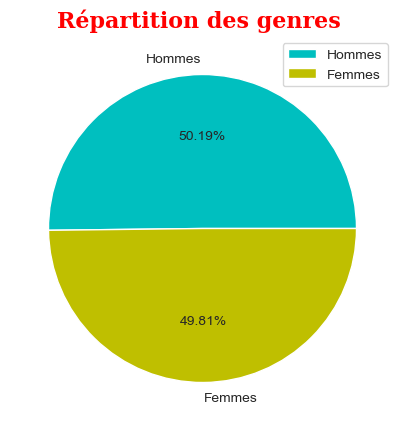

In [158]:
# visualisation des genres
plt.figure(figsize = (5,5))
labels = ["Hommes", "Femmes"]
plt.pie(df.groupby(["sex"])["client_id"].count().sort_values(ascending = False), labels = labels, colors = ["c", "y"],
        normalize = True,
        autopct = "%1.2f%%")
plt.title("Répartition des genres ", fontdict = font_title)
plt.legend()
plt.show()

* Nous obtenons 50% de nos clientèles de sexe masculin (Hommes) et 49,8% de sexe féminin (Femmes).
* Ensuite nous allons calculer le chiffre d'affaires, le nombre d'achat et la moyenne des achats par genre afin de connaitre leurs comportement sur le site.

In [159]:
# Le montant du chiffre d'affaires par genre
CA_sex = df.groupby(["sex"])["price"].sum().sort_values(ascending = False).reset_index()
CA_sex

,sex,price
0,m,5995084.51
1,f,5860851.96


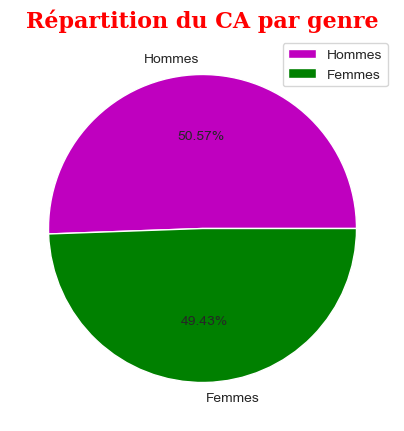

In [160]:
# visualisation de la répartition du chiffre d'affaires par genre
plt.figure(figsize = (5,5))
labels = ["Hommes", "Femmes"]
plt.pie(df.groupby(["sex"])["price"].sum().sort_values(ascending = False), labels = labels, colors = ["m", "g"],
        normalize = True,
        autopct = "%1.2f%%")
plt.title("Répartition du CA par genre", fontdict = font_title)
plt.legend()
plt.show()

In [161]:
# Le nombre d'achat par genre
NA_sex = df.groupby(["sex"])["session_id"].count().sort_values(ascending = False).reset_index()
NA_sex

,sex,session_id
0,m,340930
1,f,338402


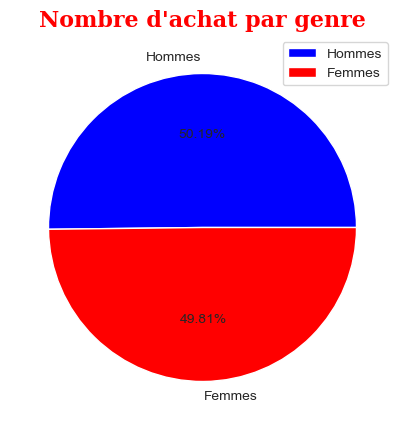

In [162]:
# visualisation du nombre d'achat par genre
plt.figure(figsize = (5,5))
labels = ["Hommes", "Femmes"]
plt.pie(df.groupby(["sex"])["session_id"].count().sort_values(ascending = False), labels = labels, colors = ["b", "r"],
        normalize = True,
        autopct = "%1.2f%%")
plt.title("Nombre d'achat par genre", fontdict = font_title)
plt.legend()
plt.show()

In [163]:
# calculer la moyenne des achats par genre
CA_moy_sex = df.groupby(["sex"])["price"].mean().sort_values(ascending = False).reset_index()
CA_moy_sex

,sex,price
0,m,17.584503
1,f,17.319200


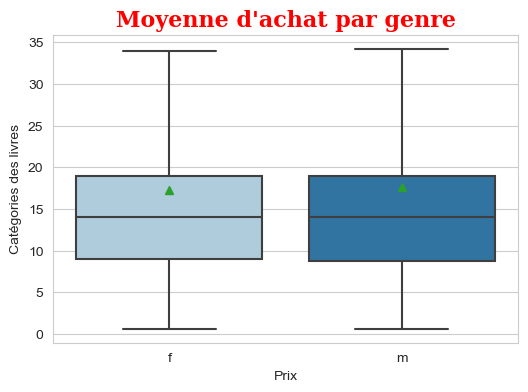

In [164]:
# visualisation de la moyenne des achats de livres par genre
plt.figure(figsize = (6,4))
sns.boxplot(y = df["price"], x = df["sex"], data = df, showfliers=False, showmeans=True, palette = "Paired")
plt.xlabel("Prix")
plt.ylabel("Catégories des livres")
plt.title("Moyenne d'achat par genre", fontdict = font_title)
plt.show()

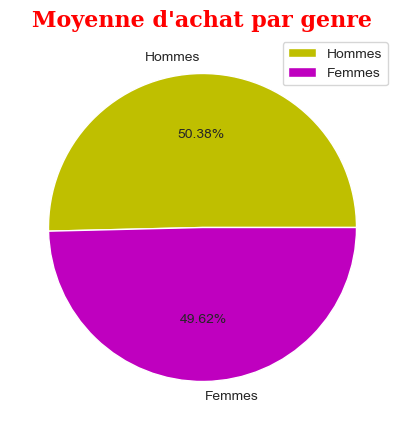

In [165]:
# visualisation de la moyenne des achats par genre
plt.figure(figsize = (5,5))
labels = ["Hommes", "Femmes"]
plt.pie(df.groupby(["sex"])["price"].mean().sort_values(ascending = False), labels = labels, colors = ["y", "m"],
        normalize = True,
        autopct = "%1.2f%%")
plt.title("Moyenne d'achat par genre", fontdict = font_title)
plt.legend()
plt.show()

## 4.1. Demandes de Julie

* Nous allons faire des tests dites Tests paramétriques et Test non paramétriques afin de vérifier les relations qui existent entre ces différentes variables.

### 4.1.a) Le lien entre le genre d’un client et les catégories des livres achetés ;

* Nous voulons savoir si le genre du client a une influence sur les catégories de livres achetés.

In [166]:
categ_prod_client = df.groupby(["sex", "categ"])["client_id"].count().sort_values(ascending = False).reset_index()
categ_prod_client.head(10)

,sex,categ,client_id
0,m,categ_0,209460
1,f,categ_0,206220
2,f,categ_1,114899
3,m,categ_1,112270
4,m,categ_2,19200
5,f,categ_2,17283


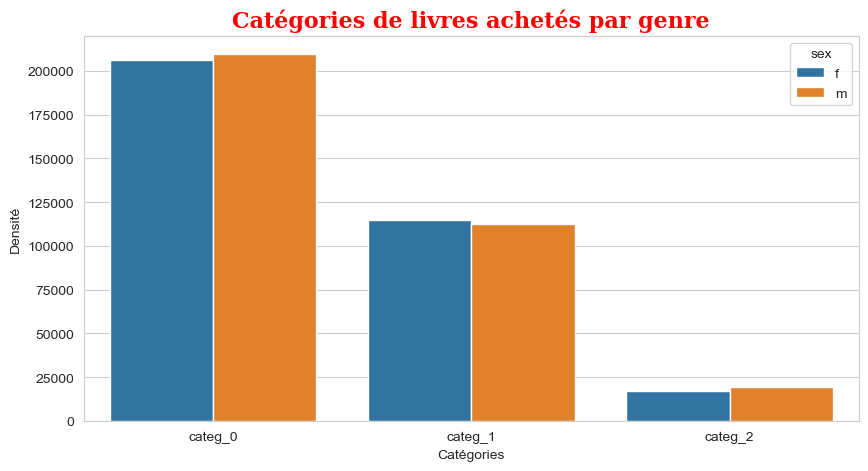

In [167]:
# Diagramme à barres de la catégorie de livres
plt.figure(figsize = (10, 5))
sns.countplot(x = df["categ"], hue = "sex", data = df)
plt.xlabel("Catégories")
plt.ylabel("Densité")
plt.title("Catégories de livres achetés par genre", fontdict = font_title)
plt.show()

* Nous observons que les proportions d'utilisation des catégories de livres entre les clients de sexe masculin et féminin sont pratiquement égales.
* Pour apporter plus de précisions sur nos résultats, nous allons faire  des tests de corrélation afin d’apporter plus de pertinence et fiabilité aux coefficients de corrélation.
* Nous avions deux variables qualitatives (catégorielles) qui sont le sexe du client (masculin ou féminin) et la catégorie de produits (livres).
* Pour cela nous allons faire un test du Khi² (Le test d’indépendance du Khi2 permet de déterminer si deux questions qualitatives son indépendantes ou non, ou autrement dit, si les réponses de l’une conditionnent les réponses de l’autre. Il ne permet toutefois pas de connaître le sens de la dépendance.)
* En posant deux hypothèses:
##### H0 = Hypothèse nulle : La proportion du genre est indépendante des catégories de livres si pvalue (=seuil statistique limite ou risque limite) > 5% ;
##### H1 = Hypothèse alternative : La proportion du genre est dépendante des catégories de livres si pvalue < 5% .
* Si la p-value < 5%, l'intervalle de confiance serait de 95%.

In [168]:
# Tableau de contigence entre les deux variables 
cont_table = pd.crosstab(df["categ"], df["sex"])
cont_table

sex,f,m
categ,,
categ_0,206220,209460
categ_1,114899,112270
categ_2,17283,19200


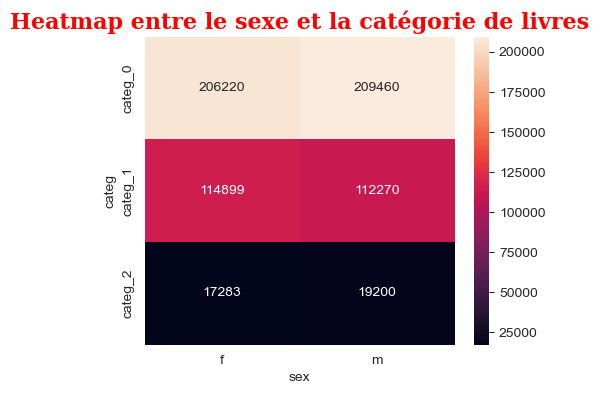

In [169]:
# Visualisation du tableau de contigence
plt.figure(figsize = (5, 4))
sns.heatmap(cont_table, annot = cont_table, fmt = 'd')
plt.xticklabels = ["Femmes","Hommes"]
plt.title("Heatmap entre le sexe et la catégorie de livres", fontdict= font_title)
plt.plot()
plt.show()

* Ce résultat obtenu du tableau de contingence résume ce que nous avions obtenus au dessus (visualisation).

In [170]:
# Test du Chi²
chi2_contingency(cont_table, correction = True)

(147.00253568681114,
 1.1989607410166063e-32,
 2,
 array([[207066.56444861, 208613.43555139],
        [113161.81769444, 114007.18230556],
        [ 18173.61785695,  18309.38214305]]))

* Nous obtenons un pvalue (= 1.1310980597090603e-32) < 5%, dans ce cas on pourra rejetter l'hypothèse nulle (H0) selon laquelle la proportion du genre est indépendante des catégories de livres.
* Nous pouvons dire que la proportion du genre est dépendante des catégories de livres c'est à dire les catégories de livres influencent le genre du client.

### 4.1.b) Le lien entre l’âge des clients et le montant total des achats ;

##### Pour cela nous allons visualiser aussi le prix des livres afin de mieux comprendre la variable puis vérifier s'il suit une loi normale comme celle de la variable "age".

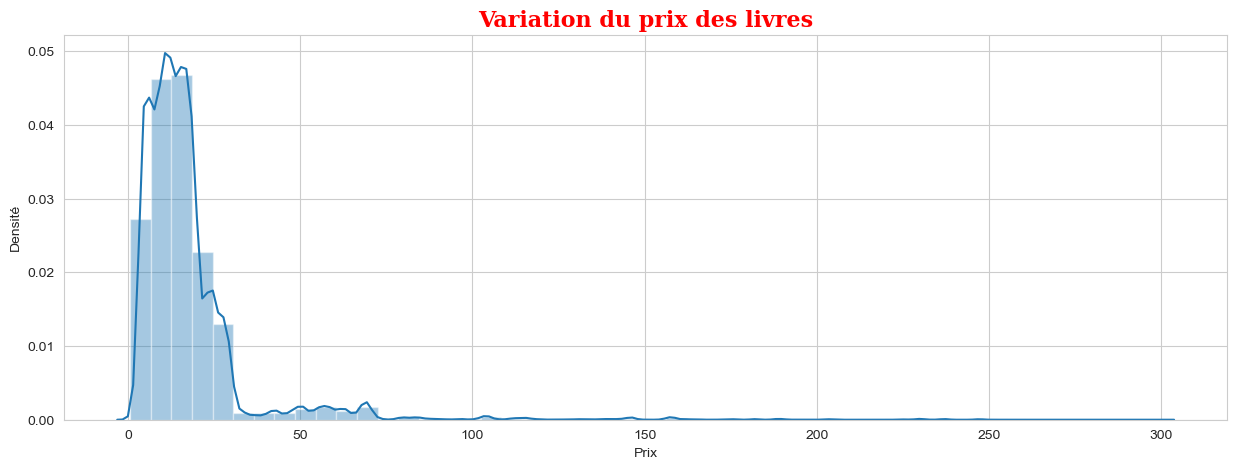

In [171]:
# visualisation de la distribution des prix
plt.figure(figsize=(15,5))
sns.distplot(df["price"], kde = True)
plt.xlabel("Prix")
plt.ylabel("Densité")
plt.title("Variation du prix des livres", fontdict = font_title)
plt.show()

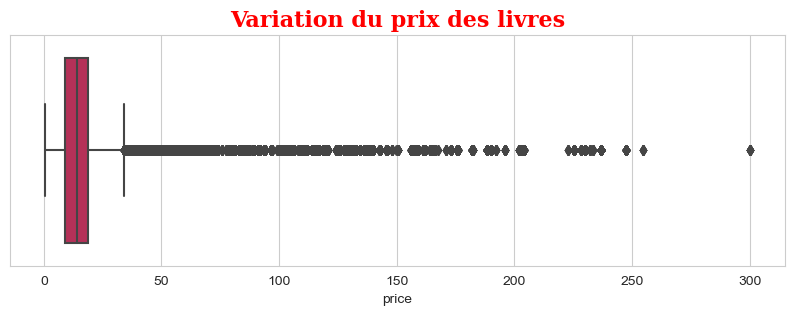

In [172]:
# visualisation de la distribution des âges
plt.figure(figsize=(10,3))
sns.boxplot(x = data_final["price"], palette = "rocket")
plt.title("Variation du prix des livres", fontdict = font_title)
plt.show()

* Nous obtenons une distribution asymetrique vers la droite, la distibution ne suit pas probablement une loi normale.
* Pour apporter plus de précisions sur nos résultats, nous allons faire des tests de corrélations.
* Nous avions deux variables quantitatives qui sont l'âge et le price (montant des achats).
* Dabord Nous allons dabord faire le Test des normalités;
* Par un test Anderson Darling (adapté pour les grands échantillons de données) la distribution des deux variables qui permettra de valider l'analyse visuelle.
* En posant deux hypothèses: 
##### H0 : les données suivent une distribution normale si pvalue > 5%
##### H1 : les données ne suivent pas une distribution normale si pvalue < 5%

In [173]:
# test de normalité
pg.normality(df, method ='normaltest')

,W,pval,normal
birth,35269.636312,0.0,False
age,35269.636312,0.0,False
price,720071.616552,0.0,False
année,43850.680172,0.0,False
mois,800755.359323,0.0,False
jour_du_mois,587731.545221,0.0,False


In [174]:
# Test de normalité des deux variables
#print(stats.anderson(df["age"], dist = "norm"))
#print(stats.anderson(df["price"], dist = "norm"))

* Nous obtenons un pvalue (=0.0) < 5%, on pourra rejetter l'hypothèse nulle selon laquelle les variables suivent une distribution normale.
* Visualisons la relation entre l'âge et le montant des achats avec un scatterplot pour voir s'il y'a une corrélation entre les deux variables.

In [175]:
# calculer le CA par âge
TA_age = df.groupby(["age"])["price"].sum().sort_values(ascending = False).reset_index()
TA_age.head(5)

,age,price
0,43,613654.54
1,19,609013.69
2,24,489497.54
3,44,334417.57
4,35,330810.68


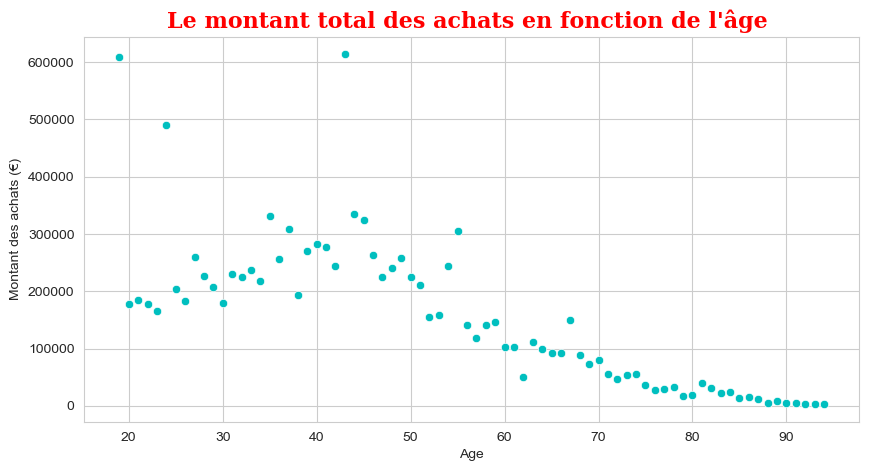

In [176]:
# Visualisation par Scatter plot
plt.figure(figsize = (10, 5))
sns.scatterplot(x = TA_age["age"],y = TA_age["price"], data = TA_age, color = "c")
plt.xlabel("Age")
plt.ylabel("Montant des achats (€)")
plt.title("Le montant total des achats en fonction de l'âge ", fontdict = font_title)
plt.show()

* Nous remarquons qu'il y'a une corrélation négative entre l'âge d'un client et le montant des achats.
* Les deux variables ne suivent pas une loi normale.
* Pour cela nous allons faire un test de correlation non paramétrique (les deux variables ne suivent pas une loi normale)
* Dans le cas contraire nous aurons utiliser un Test de correlation de Pearson (Test paramétrique).
* En possant deux hypothèses : 
##### H0 = Hypothèse nulle : La proportion d'âge n'est pas correlée au montant total des achats si pvalue > 5% ;
##### H1 = Hypothèse alternative : La proportion d'âge est correlée au montant total des achats si pvalue < 5% .

#### Test paramétrique de Pearson

In [177]:
# Test de correlation de pearsonr
pearsonr_statistic, pearsonr_pvalue = stats.pearsonr(TA_age["price"], TA_age["age"])
print(f"spearsonr_test : statistique = {pearsonr_statistic} ; pvalue = {pearsonr_pvalue}")

spearsonr_test : statistique = -0.778861576458701 ; pvalue = 1.198396010000475e-16


* Nous obtenons un pvalue (= 1.1949535843461096e-16) < 5%, dans ce cas on pourra rejetter l'hypothèse nulle (H0) selon laquelle la proportion d'âge n'est pas correlée au prix des livres.
* Nous pouvons dire que la proportion d'âge est dépendante au prix des livres (correlation très faible avec le coefficient de pearsonr = -0.7788810457116597) c'est à dire que l'âge a une influence faible sur le montant des achats (en supposant que les variables suivent une distribution normale).

#### Test non paramétrique de Spearman

* Les deux variables ne suivent pas une distribution normale.
* Pour cela nous allons faire un test de correlation de Spearman qui est un test non paramétrique.
* En posant deux hypothèses: 
##### H0 = Hypothèse nulle : La proportion d'âge n'est pas correlée au montant total des achats si pvalue > 5% ;
##### H1 = Hypothèse alternative : La proportion d'âge est correlée au montant total des achats si pvalue < 5% .

In [178]:
# Test de correlation de Spearman
# Spearman_statistic, Spearman_pvalue = stats.spearmanr(TA_age.index, TA_age.values)
Spearman_statistic, Spearman_pvalue = stats.spearmanr(TA_age["price"], TA_age["age"])
print(f"Spearman_test : statistique = {Spearman_statistic} ; pvalue = {Spearman_pvalue}")

Spearman_test : statistique = -0.8576076555023923 ; pvalue = 4.57972879340901e-23


* Nous obtenons un pvalue (=  4.5797287934090096e-23) < 5% , dans ce cas on pourra rejetter l'hypothèse nulle (H0) selon laquelle la proportion d'âge n'est pas correlée au prix des livres.
* Nous pouvons dire que le montant total des achats dépend de la la catégorie d'âge.

### 4.1.c) Le lien entre les catégories d'âge des clients et le montant total des achats ;

In [179]:
# calculer le montant total des achats par tranche d'âge
TA_categ_age = df.groupby(["groupe_age"])["price"].sum().sort_values(ascending = False).reset_index()
TA_categ_age.head(5)

,groupe_age,price
0,Juniors (35-50ans),4318568.43
1,Seniors (50-100ans),3232862.80
2,Jeunes (25-35ans),2296519.45
3,Adolescents (15-25ans),2007985.79


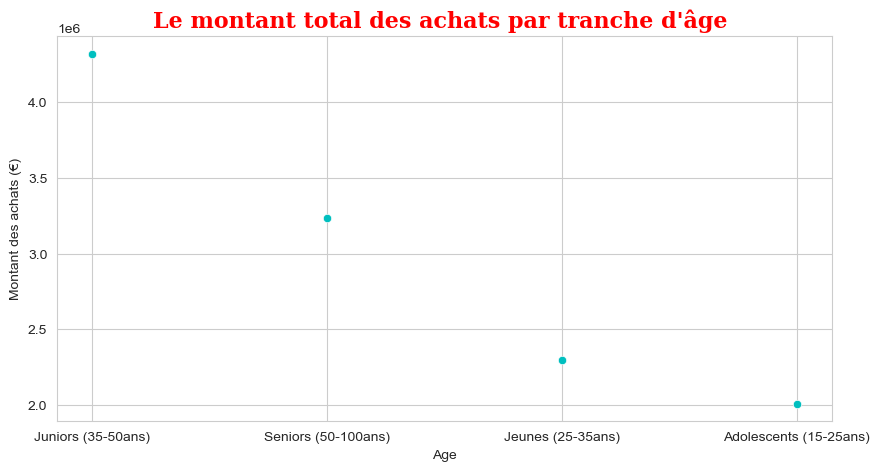

In [180]:
# Visualisation par Scatter plot
plt.figure(figsize = (10, 5))
sns.scatterplot(x = TA_categ_age["groupe_age"],y = TA_categ_age["price"], data = TA_categ_age , color = "c")
plt.xlabel("Age")
plt.ylabel("Montant des achats (€)")
plt.title("Le montant total des achats par tranche d'âge ", fontdict = font_title)
plt.show()

* Nous avions une variable qualitative (catégorielle) avec plus de deux modalités et une variable quantitative.
* C'est pour cela nous ne pouvons pas utiliser le Test de Student pour comparer les moyennes de deux groupes indépendants ou appariés.
* Pour vérifier le lien entre les deux variables, nous allons utiliser le Test d'analyse unidirectionnelle de la variance (ANOVA) qui permet de comparer la moyenne de plus de deux groupes (tranches d'âge) qui est un test paramétrique en supposant une distribution normale et égalité de la moyenne des variances;
* En supposant deux hypothèses: 
##### H0 = Hypothèse nulle : Les moyennes des différentes groupes sont égales entre elles si pvalue > 5% ;
##### H1 = Hypothèse alternative : Au moins l'une des moyennes diffèrent des autres si pvalue < 5% .
* Dabord Nous allons dabord faire le Test des normalités et d'homogéneité des variables ;
* Ensuite faire le Test d'égalité des variances ANOVA en supposant que la distribution est normale et aussi il y'a égalité de la moyenne des variances;

#### Test des normalités et d'homogéneité des variables

In [181]:
# test de normalité
pg.normality(df["price"], method ='normaltest')

,W,pval,normal
price,720071.616552,0.0,False


In [182]:
# Test de Normalite de la repartition des ages
#print(stats.anderson(TA_categ_age["price"], dist="norm"))

* Le test confirme que la variables (la distribution) ne suit pas une loi normale, on pourra rejetter l'hypothèse nulle.
* Le choix est porter sur un test de Levene (si on avait seulement deux groupes ou plus) car il est plus efficace lorsque les distributions ne suivent pas une loi normale pour vérifier l'égalité des variances. 
##### Test Levene: H0 = les variances sont égales ;
##### H1 = les variances ne sont pas égales.

In [183]:
# Homogéineté des variances avec le test de levene
# pg.homoscedasticity(df, method = 'levene', alpha = 0.05)
pg.homoscedasticity(df, dv = "price", group = "groupe_age", method = 'levene', alpha = 0.05)

,W,pval,equal_var
levene,34704.636429,0.0,False


In [184]:
# Test d'égalité des variances 
levene_statistic, levene_pvalue = stats.levene(
        df[df["groupe_age"] == "Adolescents (15-25ans)"]["price"],
        df[df["groupe_age"] == "Jeunes (25-35ans)"]["price"],
        df[df["groupe_age"] == "Juniors (35-50ans)"]["price"],
        df[df["groupe_age"] == "Seniors (50-100ans)"]["price"],
        center = "median")
print(f"Levene_test : statistique = {levene_statistic} ; pvalue = {levene_pvalue}")

Levene_test : statistique = 34704.63642888392 ; pvalue = 0.0


* Nous obtenons un pvalue (= 0.0) < à 5%, dans ce cas nous pouvons rejetter l'hypothèse nulle d'égalité de moyenne des variances entre elles.
* Pour cela nous ne pouvons pas appliquer le test de Student.
*  On pouvait faire aussi d'autres test pour vérifier la normalité comme: 
##### test de normalité Jacque-bera plus adaptés que le test de Shapiro pour les grandes tailles.
##### test de normalité Shapiro-wilk pour les échantillons de petits ou moyens taille mais très puissant.

In [185]:
# test de normalité Jacque-bera en supposant que les données sont normalement distribuée 
JB_statistic, JB_pvalue = stats.jarque_bera(TA_categ_age["price"])
# print(f"JB_test : statistique = {JB_statistic} ; pvalue = {JB_pvalue}")

# test de normalité Shapiro-wilk en supposant que les données sont normalement distribuée
sha_statistic, sha_pvalue = stats.shapiro(TA_categ_age["price"])
# print(f"shapiro_test : statistique = {sha_statistic} ; pvalue = {sha_pvalue}")

In [186]:
# Implémentation de l'ANOVA
Adolescents = df[df["groupe_age"] == "Adolescents (15-25ans)"]["price"]
Jeunes = df[df["groupe_age"] == "Jeunes (25-35ans)"]["price"]
Juniors = df[df["groupe_age"] == "Juniors (35-50ans)"]["price"]
Seniors = df[df["groupe_age"] == "Seniors (50-100ans)"]["price"]

# Appliquer l'ANOVA
f_statistic, anova_pvalue = stats.f_oneway(Adolescents, Jeunes, Juniors, Seniors)
print(f"Anova test : satatistique = {f_statistic} ; pvalue = {anova_pvalue}")

Anova test : satatistique = 43010.168861507795 ; pvalue = 0.0


* Nous obtenons un pvalue (= 0.0) < à 5%, dans ce cas nous pouvons rejetter l'hypothèse nulle d'égalité des moyennes entre elles, et admettre que l'une des moyennes diffèrent.
* Il n'y a pas égalité des moyennes , le montant des achats diffère selon l'âge.
* Nous allons faire l'alternatif du test ANOVA qui est un test non paramétrique(aucune condition sur la distribution de probabilité) appelé test de Kruskal et Wallis qui un alternatif du test de l'ANOVA..

#### Test non paramétrique de Kruskal et Wallis

In [187]:
# Appliquer le test de Kruskal et Wallis 
kruskal_t,kruskal_pvalue = stats.kruskal(Adolescents, Jeunes, Juniors, Seniors)
print(f"Kruskal-Wallis test : statistique = {kruskal_t} ; pvalue = {kruskal_pvalue}")

Kruskal-Wallis test : statistique = 57712.55800641006 ; pvalue = 0.0


* Nous obtenons un pvalue (= 0.0) < à 5%, dans ce cas nous pouvons rejetter l'hypothèse nulle d'égalité des moyennes entre elles, et admettre que l'une des moyennes diffèrent.

### 4.1.c) Le lien entre le sexe et le montant des achats

In [188]:
# Le montant du chiffre d'affaires par genre
CA_sexe = df.groupby(["sex"])["price"].sum().sort_values(ascending = False).reset_index()
CA_sexe

,sex,price
0,m,5995084.51
1,f,5860851.96


* Nous avions la variable "price" qui ne suit pas une loi normale;
* Pour cela nous allons faire un test de levene pour vérifier l'égalité des variances efficace si une distribution ne suit pas une loi normale.
#### Test paramétrique
##### H0 = Hypothèse nulle : Les variances sont égales si pvalue > 5% ;
##### H1 = Hypothèse alternative : Les variances sont différentes les unes des autres si pvalue < 5% .

In [189]:
# Test d'égalité des variances 
levene_statistic, levene_pvalue = stats.levene(
        df[df["sex"] == "m"]["price"],
        df[df["sex"] == "f"]["price"],
        center = "median")
print(f"Levene_test : statistique = {levene_statistic} ; pvalue = {levene_pvalue}")

Levene_test : statistique = 53.42221837220894 ; pvalue = 2.6932996747892295e-13


* Nous obtenons un pvalue (=2.7938672208114943e-13) < 5%, dans ce cas on pourra rejetter l'hypothèse nulle (H0) selon laquelle il y'a égalité des variances c'est à dire la proportion du genre est indépendante du montant des achats.
* Nous pouvons dire les variances diffèrent c'est à dire la proportion du genre est dépendante du chiffre d'affaires.
* Pour cela nous faire un test non paramétrique appelé test de Man-Withney qui est alternatif au test de Student (tester la liaison entre une variable quantitative et une variable qualitative à deux (2) modalités).
* En posant deux hypothèses: 
##### H0: Il n'y a pas de corrélation entre les deux variables si pvalue > 5%;
##### H1: Il y'a correlation entre les deux variables si pvalue < 5%..

#### Test non paramétrique de Man-Withney

In [190]:
# Créer de nouvelles variables
masculin = df[df["sex"] == "m"]["price"]
feminin = df[df["sex"] == "f"]["price"]

# Appliquer le test de  Man-Withney
manwithney_statistic, manwithney_pvalue = stats.mannwhitneyu(masculin, feminin)
print(f"Man-Withney_test : statistique = {manwithney_statistic} ; pvalue = {manwithney_pvalue}")

Man-Withney_test : statistique = 57653573910.0 ; pvalue = 0.6909796188651668


* Nous obtenons un pavalue (= 0.6835508984061051) > 5% , on pourra pas rejetter l'hypothèse nulle selon laquelle Il n'y a pas de corrélation entre les deux variables.
* Nous pouvons dire la proportion de genre est indépendante du montant des achats.

### 4.1.d) Le lien entre l'âge et la taille du panier moyen

In [191]:
# Calculons le nombre d'achats par âge = fréq
# # calculer le panier moyen par age 
# age = df.groupby(["age","client_id])["price"].sum().mean()
NA_age = df.groupby(["age"])["session_id"].count().sort_values(ascending = False).reset_index()
NA_age.head(5)

,age,session_id
0,43,47413
1,35,25005
2,44,24893
3,45,24677
4,37,23475


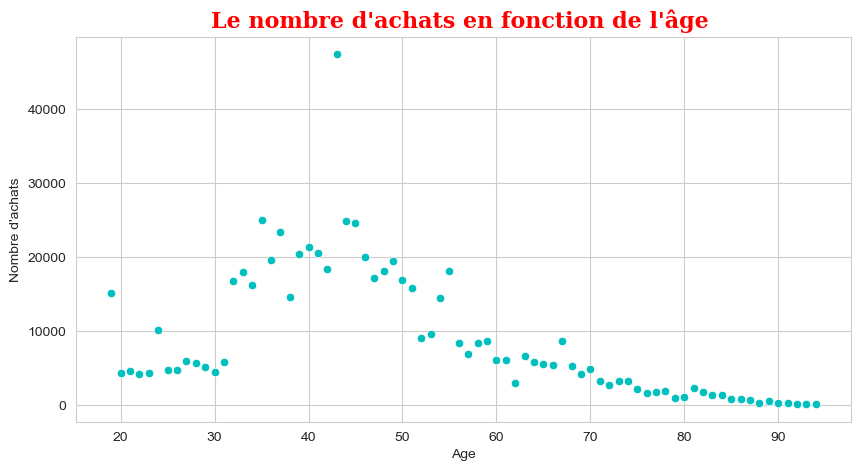

In [192]:
# Visualisation par Scatter plot
plt.figure(figsize = (10, 5))
sns.scatterplot(x = NA_age["age"],y = NA_age["session_id"], data = TA_age, color = "c")
plt.xlabel("Age")
plt.ylabel("Nombre d'achats")
plt.title("Le nombre d'achats en fonction de l'âge ", fontdict = font_title)
plt.show()

* Nous remarquons qu'il y'a une corrélation négative entre l'âge d'un client et le montant des achat
* Nous avions deux variables quantitatives age et nombre d'achats, et l'une des variables (age) ne suit pas une distribution normale;
* Pour cela nous ne pouvons pas faire un test de Pearson qui est un test paramétrique ( les variables doivent suivre une loi normale;
* Nous allons faire un test non paramétrique de Spearman; 
* en posant deux hypothèses:
##### H0 = Hypothèse nulle : La proportion d'âge n'est pas correlée à la fréquence d'achat si pvalue > 5% ;
##### H1 = Hypothèse alternative : La proportion d'âge est correlée à la fréquence d'achat si pvalue < 5% .

#### Test non paramétrique de Spearman

In [193]:
# Test de correlation de Spearman
Spearman_statistic, Spearman_pvalue = stats.spearmanr(NA_age["age"], NA_age["session_id"])
print(f"Spearman_test : statistique = {Spearman_statistic} ; pvalue = {Spearman_pvalue}")

Spearman_test : statistique = -0.6846206425153794 ; pvalue = 9.152883867240306e-12


* Nous obtenons un pvalue (= 9.17297066447968e-12) < 5% , dans ce cas on pourra rejetter l'hypothèse nulle (H0) selon laquelle la proportion d'âge n'est pas correlée à la fréquence d'achat.
* Nous pouvons dire que la proportion d'âge dépend à la fréquence d'achat.

### 4.1.e) Le lien entre l'âge et les catégories des livres achetés.

In [194]:
# calculer le CA par âge
cat_age_liv = df.groupby(["age", "categ"])["price"].sum().sort_values(ascending = False).reset_index()
cat_age_liv.head(5)

,age,categ,price
0,19,categ_2,454736.86
1,24,categ_2,398751.17
2,43,categ_0,392536.93
3,43,categ_1,213668.29
4,35,categ_0,203455.21


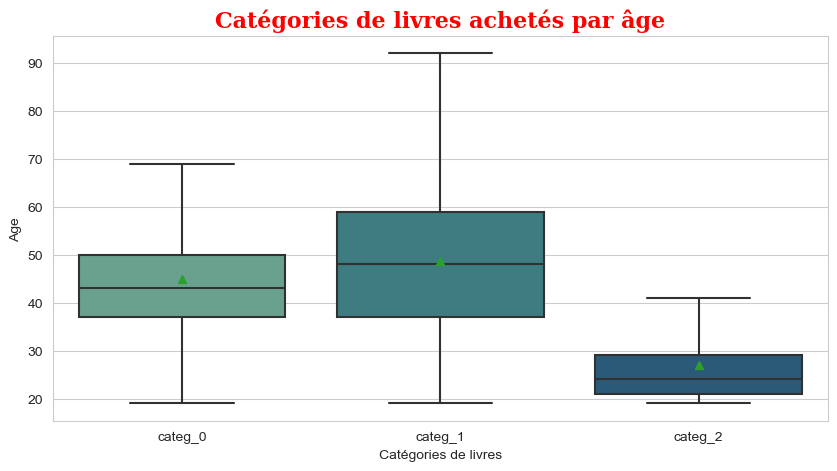

In [195]:
# Boites à moustache
plt.figure(figsize = (10, 5))
sns.boxplot(x = df["categ"], y= df["age"], data = df, showfliers=False, showmeans=True, palette = "crest")
plt.xlabel("Catégories de livres")
plt.ylabel("Age")
plt.title("Catégories de livres achetés par âge", fontdict = font_title)
plt.show()

* On observe une différence significative de la moyenne (points verts) d’âge au sein des deux groupes (catégories de livres)
* On pourrait penser qu’il ya bien une différence entre l’age median et la catégorie de livres achetés c'est à dire l'âge différe selon la catégorie de livres achatés

#### Test non paramétrique

In [196]:
# Test d'égalité des variances 
levene_statistic, levene_pvalue = stats.levene(
        df[df["categ"] == "categ_0"]["age"],
        df[df["categ"] == "categ_1"]["age"],
        df[df["categ"] == "categ_2"]["age"],
        center = "median")
print(f"Levene_test : statistique = {levene_statistic} ; pvalue = {levene_pvalue}")

Levene_test : statistique = 26091.730839883516 ; pvalue = 0.0


In [197]:
# Homogéineté des variances avec le test de levene
# pg.homoscedasticity(df, method = 'levene', alpha = 0.05)
pg.homoscedasticity(df, dv = "age", group = "categ", method = 'levene', alpha = 0.05)

,W,pval,equal_var
levene,26091.73084,0.0,False


In [198]:
# Implémentation du test 
categ_0 = df[df["categ"] == "categ_0"]["age"]
categ_1 = df[df["categ"] == "categ_1"]["age"]
categ_2 = df[df["categ"] == "categ_2"]["age"]

# Appliquer le test de Kruskal et Wallis 
kruskal_t,kruskal_pvalue = stats.kruskal(categ_0, categ_1, categ_2)
print(f"Kruskal-Wallis test : statistique = {kruskal_t} ; pvalue = {kruskal_pvalue}")

Kruskal-Wallis test : statistique = 79350.86927924873 ; pvalue = 0.0


* Nous obtenons un pvalue (= 0.0) < 5%, dans ce cas on pourra rejetter l'hypothèse nulle (H0) selon laquelle l'âge est indépendante des catégories de livres.
* Nous pouvons dire que l'âge dépendante des catégories de livres achetés.

### 4.1.f) Le lien entre les catégories d'âge et les catégories des livres achetés.

In [199]:
# Calculer les catégories de livres les achetés selon l'âge
categ_liv_age = df.groupby(["categ","groupe_age"])["price"].sum().sort_values(ascending = False).reset_index()
categ_liv_age

,categ,groupe_age,price
0,categ_0,Juniors (35-50ans),2649600.00
1,categ_1,Seniors (50-100ans),2110027.00
2,categ_1,Juniors (35-50ans),1567542.10
3,categ_2,Adolescents (15-25ans),1536651.34
4,categ_2,Jeunes (25-35ans),992359.61
5,categ_0,Seniors (50-100ans),972998.06
6,categ_0,Jeunes (25-35ans),696957.65
7,categ_1,Jeunes (25-35ans),607202.19
8,categ_1,Adolescents (15-25ans),368951.40
9,categ_2,Seniors (50-100ans),149837.74


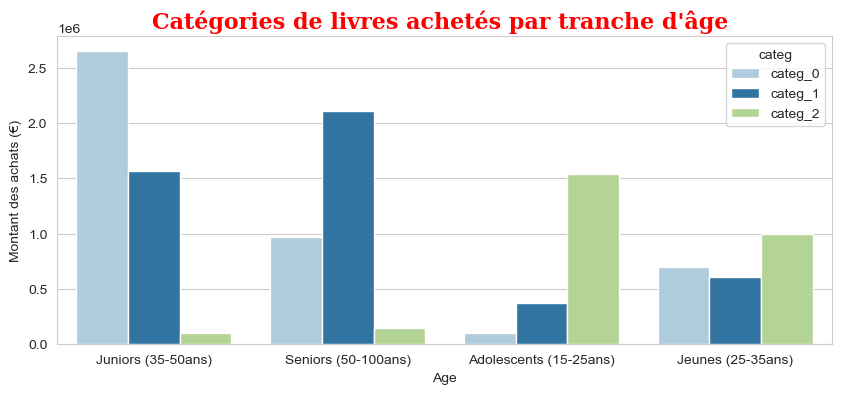

In [200]:
# Visualisation 
plt.figure(figsize = (10, 4))
sns.barplot(x = categ_liv_age["groupe_age"], y = categ_liv_age["price"], hue = "categ", data = categ_liv_age, palette = "Paired")
plt.xlabel("Age")
plt.ylabel("Montant des achats (€)")
plt.title("Catégories de livres achetés par tranche d'âge ", fontdict = font_title)
plt.show()

#### Test Khi²

##### H0 = Hypothèse nulle : La proportion des tranches d'âge est indépendante des catégories de livres si pvalue > 5%;
##### H1 = Hypothèse alternative : La proportion des tranches d'âge est dépendante des catégories de livres si pvalue < 5% .

In [201]:
# Tableau de contigence entre les deux variables 
conta_table = pd.crosstab(df["groupe_age"], df["categ"])
conta_table

categ,categ_0,categ_1,categ_2
groupe_age,,,
Adolescents (15-25ans),9603,17916,20336
Jeunes (25-35ans),65342,29566,13168
Juniors (35-50ans),249454,76765,1100
Seniors (50-100ans),91281,102922,1879


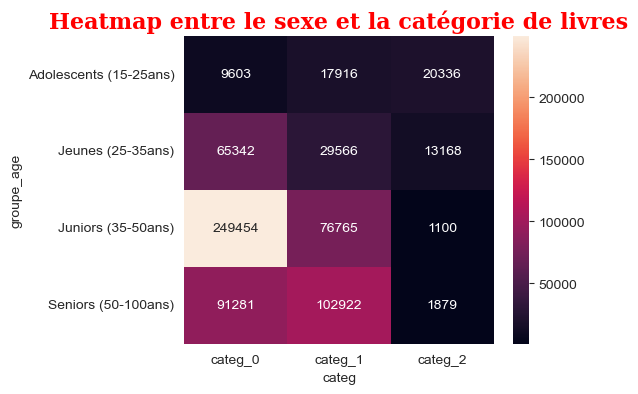

In [202]:
# Visualisation du tableau de contigence
plt.figure(figsize = (5, 4))
sns.heatmap(conta_table, annot = conta_table, fmt ='d')
plt.xticklabels = ["categ_0","categ_1","categ_2"]
plt.title("Heatmap entre le sexe et la catégorie de livres", fontdict= font_title)
plt.plot()
plt.show()

In [203]:
# Test du Chi²
chi2_contingency(conta_table, correction = True)

(219347.47699226998,
 0.0,
 6,
 array([[ 29282.24549999,  16002.73871244,   2570.01578757],
        [ 66131.1872251 ,  36140.67472753,   5804.13804738],
        [200284.92978396, 109455.65630796,  17578.41390807],
        [119981.63749095,  65569.93025207,  10530.43225698]]))

* Nous obtenons un pvalue (= 0.0) < 5%, dans ce cas on pourra rejetter l'hypothèse nulle (H0) selon laquelle la proportion des tranches d'âge est indépendante des catégories de livres.
* Nous pouvons dire que la proportion des tranches d'âge dépendante des catégories de livres.

### 4.1.g) La fréquence d'achat par client

In [204]:
# Nombre moyen d'achats par sessions
print("Il y a eu",
      df["session_id"].nunique(),
      "sessions")

print("Une session aboutie en moyenne à",
      round(df.groupby(["session_id","client_id"])["id_prod"].count().mean(),2),
      "achats")

Il y a eu 342315 sessions
Une session aboutie en moyenne à 1.98 achats


In [205]:
# calculer le CA et le nombre d'achat par client pour une session
df_freq = df.groupby(["client_id", "année", "mois", "age"]).agg({"price": "sum",
                                                                 "session_id" : "nunique"}).sort_values(by = "session_id",ascending = False).reset_index()

# afficher le dataframe
df_freq.head(10)

,client_id,année,mois,age,price,session_id
0,c_1609,2021,12,43,16986.79,537
1,c_1609,2021,9,43,17392.13,512
2,c_1609,2021,11,43,14198.61,487
3,c_1609,2022,5,43,14230.53,486
4,c_1609,2022,12,43,14315.65,481
5,c_1609,2021,5,43,13583.81,476
6,c_1609,2022,8,43,13271.65,475
7,c_1609,2022,6,43,14113.09,471
8,c_1609,2022,9,43,14320.05,470
9,c_1609,2021,10,43,11278.27,460


* Il y a 342 315 sessions pour un total de 679 332 transactions, en moyenne une session aboutie sur 1,98 achats.

In [206]:
# calculer le CA et le nombre de vente par catégories et jour du mois 
df_freq_achat = df.groupby(["client_id","groupe_age", "année", "mois"])["session_id"].nunique().groupby(["client_id","groupe_age"]).mean().sort_values(ascending = False).reset_index()

# afficher le dataframe
df_freq_achat.head(10)

,client_id,groupe_age,session_id
0,c_1609,Juniors (35-50ans),458.416667
1,c_3454,Seniors (50-100ans),232.208333
2,c_4958,Adolescents (15-25ans),160.458333
3,c_6714,Seniors (50-100ans),109.208333
4,c_8526,Seniors (50-100ans),6.875000
5,c_1637,Jeunes (25-35ans),6.833333
6,c_669,Jeunes (25-35ans),6.791667
7,c_2265,Seniors (50-100ans),6.791667
8,c_8510,Jeunes (25-35ans),6.708333
9,c_682,Juniors (35-50ans),6.708333


In [207]:
# faire une jointure pour obtenir l'âge des clients
freq_achat_mensu = pd.merge(data_customers, df_freq_achat, on = "client_id", how = "outer")
# suppression des NaN
freq_achat_mensu = freq_achat_mensu.dropna()                                                

# Lien entre l'age et la frequence d'achat mensuelle:
freq_achat_age = freq_achat_mensu.groupby(["groupe_age","age"])["session_id"].sum().sort_values(ascending = False).reset_index()
freq_achat_age.head(10)

,groupe_age,age,session_id
0,Juniors (35-50ans),43,918.324155
1,Adolescents (15-25ans),19,629.956462
2,Seniors (50-100ans),54,524.594369
3,Juniors (35-50ans),44,512.075712
4,Jeunes (25-35ans),35,501.997883
5,Juniors (35-50ans),45,492.978553
6,Juniors (35-50ans),37,484.867557
7,Seniors (50-100ans),55,455.257255
8,Juniors (35-50ans),41,431.917863
9,Juniors (35-50ans),40,430.245271


#### Test non paramétrique

In [208]:
# Test de correlation de Spearman en présence des clients professionnels
Spearman_statistic, Spearman_pvalue = stats.spearmanr(freq_achat_mensu["age"], freq_achat_mensu["session_id"])
print(f"Spearman_test : statistique = {Spearman_statistic} ; pvalue = {Spearman_pvalue}")

Spearman_test : statistique = 0.20589327229102006 ; pvalue = 5.572887167216921e-83


* Nous obtenons un pvalue (= 5.572887167216921e-83) < 5%, dans ce cas on pourra rejetter l'hypothèse nulle (H0) selon laquelle la fréquance d'achat est indépendante à l'âge.
* Nous pouvons dire que la fréquance d'achat est dépendante à l'âge.

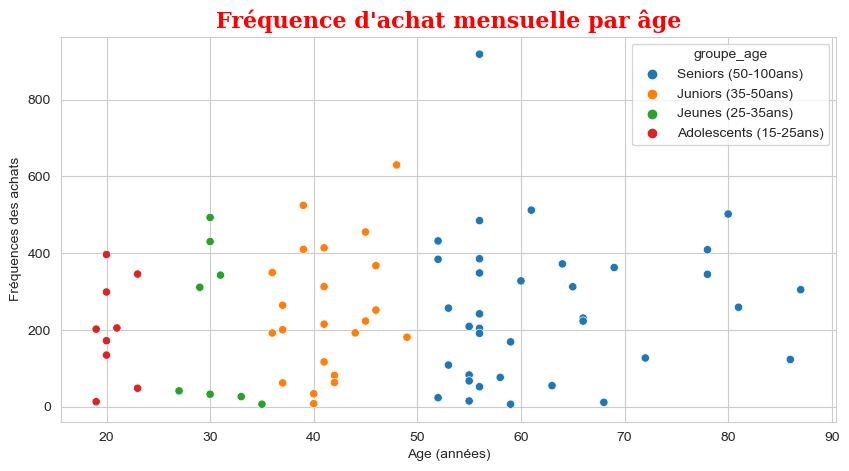

In [209]:
# visualisation
plt.figure(figsize = (10, 5))
sns.scatterplot(x = freq_achat_mensu["age"], y = freq_achat_age["session_id"], hue ="groupe_age", data = freq_achat_mensu)
plt.ylabel("Fréquences des achats")
plt.xlabel("Age (années)")
plt.title("Fréquence d'achat mensuelle par âge", fontdict= font_title)
plt.show()

In [210]:
# Suppression de ces clients professionnels
freq_achat_mensu = freq_achat_mensu.drop(freq_achat_mensu[freq_achat_mensu["client_id"] == "c_1609"].index)
freq_achat_mensu = freq_achat_mensu.drop(freq_achat_mensu[freq_achat_mensu["client_id"] == "c_3454"].index)
freq_achat_mensu = freq_achat_mensu.drop(freq_achat_mensu[freq_achat_mensu["client_id"] == "c_4958"].index)
freq_achat_mensu = freq_achat_mensu.drop(freq_achat_mensu[freq_achat_mensu["client_id"] == "c_6714"].index)

# Test de correlation de Spearman en présence des clients professionnels
Spearman_statistic, Spearman_pvalue = stats.spearmanr(freq_achat_mensu["age"], freq_achat_mensu["session_id"])
print(f"Spearman_test : statistique = {Spearman_statistic} ; pvalue = {Spearman_pvalue}")

Spearman_test : statistique = 0.20608355165108688 ; pvalue = 4.272028369734415e-83


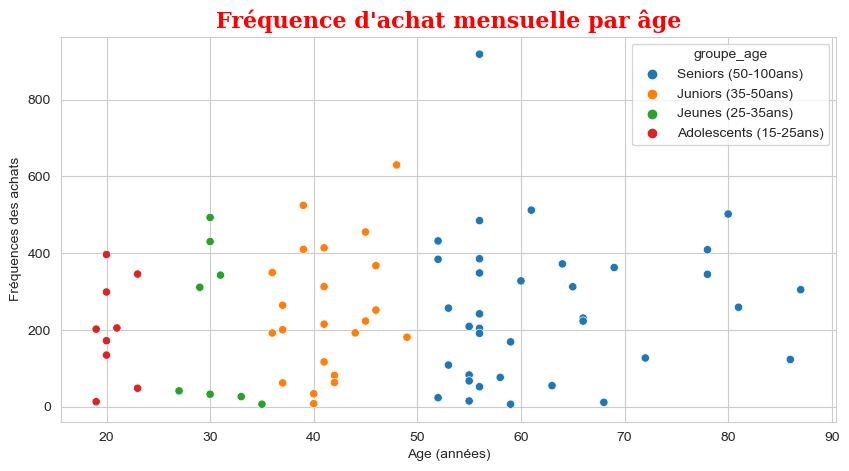

In [211]:
# visualisation après suppression des 4 professionnels
plt.figure(figsize = (10, 5))
sns.scatterplot(x = freq_achat_mensu["age"], y = freq_achat_age["session_id"], hue ="groupe_age", data = freq_achat_mensu)
plt.ylabel("Fréquences des achats")
plt.xlabel("Age (années)")
plt.title("Fréquence d'achat mensuelle par âge", fontdict= font_title)
plt.show()

La fréquence d'achats (le nombre de livres par mois) classe d'autant mieux les 3 groupes d'individus définis plus tôt :

* les moins de 30 ans achètent le même nombre de livrees (jamais plus de 3 livres par mois)
* les 30-50 ans se démarquent : un quart de ces clients achète plus de 8 livres par mois.
* les plus de 50 ans ont des habitudes plus variées, mais achètent rarement plus de 5 livres

# 5. Références

##### Source convertir les dates
##### https://www.programiz.com/python-programming/datetime/strftime
##### https://www.programiz.com/python-programming/datetime/current-time
##### https://www.statology.org/convert-datetime-to-date-pandas/

##### Source décomposition des séries chronologiques en Python : décomposition des composants saisonniers et de tendance à l'aide de modèles statistiques:
##### https://aleksandarhaber.com/decomposition-of-time-series-in-python-trend-and-seasonal-periodic-components/
##### https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
##### https://towardsdatascience.com/time-series-diy-seasonal-decomposition-f0b469afed44
##### https://www.youtube.com/watch?v=oYznkynySJ0

##### Source pour la courbe de Lorenze ei indice de Gini:
##### https://www.youtube.com/watch?v=sZKZ-cmEpfM
##### https://zhiyzuo.github.io/Plot-Lorenz/
##### https://www.bibmath.net/dico/index.php?action=affiche&quoi=./l/lorenzcourbe.html

##### Source pour les tests:
##### https://www.alliage-ad.com/data-science/comment-etudier-la-liaison-entre-une-variable-quantitative-et-une-variable-qualitative/
##### https://asardell.github.io/statistique-python/
##### https://pingouin-stats.org/build/html/guidelines.html
##### https://pingouin-stats.org/build/html/index.html
##### https://statisticsbyjim.com/basics/spearmans-correlation/
##### https://www.soft-concept.com/surveymag/test-independance-khi-2.html